# Notebook to test models

In [1]:
from rivapy.models.gbm import GBM
from rivapy.models.heston_for_DH import HestonForDeepHedging
#from rivapy.models.roughbergomi_for_DH import rBergomiForDeepHedging
from rivapy.models.heston_with_jumps import HestonWithJumps
from rivapy.models.barndorff_nielsen_shephard import BNS

#import sys
#sys.path.insert(0,'../..')
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

%load_ext autoreload
%autoreload 2
%matplotlib inline

C:\Users\Anwender\Documents\GitHub\RiVaPy_development\RiVaPy\rivapy\__init__.py:11: UserWarning: The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.
  warnings.warn('The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.')


In [7]:

# importing the module 
import ast 
  
# reading the data from the file 
with open('model_params_dict.txt') as f: 
    data = f.read() 
  
# reconstructing the data as a dictionary 
model_params_dict = ast.literal_eval(data) 
  

In [2]:
#save parameters for models
model_params = {'GBM': {'drift': [], 'vol': []}, 
                'Heston': {'rate_of_mean_reversion': [], 'long_run_average': [], 'vol_of_vol': [], 'correlation_rho': [], 'v0': []}, 
                'Heston with Jumps' : {'rate_of_mean_reversion': [], 'long_run_average': [], 'vol_of_vol': [], 'correlation_rho': [],
                                        'lmbda':[], 'v0': []}, 
                'BNS': {'rho':[], 'lmbda':[], 'b': [], 'a': [], 'v0':[]}}

In [4]:
np.random.seed(123)
n = 30
T = n/365
ttm = T
timegrid = np.linspace(0.0,T,n) # simulate on daily timegrid over 30 days
n_sims = 1000
S0 = 1.#24.6144
K = S0

drift = np.linspace(-0.5,0.5,50)#40)
vol = np.linspace(0.1,0.8,50)#40)
for d in drift:
    d = 0.
    for v in vol:
        model_GBM = GBM(d,v)
        #paths_GBM = model_GBM.simulate(timegrid, S0=S0, v0=0., M=n_sims,n=n,model_name='GBM')
        price = model_GBM.compute_call_price(S0=S0,v0=0.,K=K,ttm=ttm)
        if ((price <= 0.09) and (price >= 0.01)):
            print(price)
            print(price)
            model_params['GBM']['drift'].append(d)
            model_params['GBM']['vol'].append(v)



print('GBM done.')




0.011436928026247184
0.011436928026247184
0.013070637862816092
0.013070637862816092
0.01470429289317221
0.01470429289317221
0.0163378862687365
0.0163378862687365
0.017971411141705695
0.017971411141705695
0.019604860665137835
0.019604860665137835
0.021238227993039205
0.021238227993039205
0.02287150628044965
0.02287150628044965
0.024504688683528952
0.024504688683528952
0.02613776835964282
0.02613776835964282
0.02777073846744882
0.02777073846744882
0.02940359216698263
0.02940359216698263
0.031036322619743706
0.031036322619743706
0.0326689229887811
0.0326689229887811
0.034301386438779946
0.034301386438779946
0.03593370613614638
0.03593370613614638
0.03756587524909433
0.03756587524909433
0.03919788694773052
0.03919788694773052
0.040829734404140894
0.040829734404140894
0.04246141079247567
0.04246141079247567
0.044092909289035254
0.044092909289035254
0.045724223072356185
0.045724223072356185
0.047355345323295994
0.047355345323295994
0.04898626922511934
0.04898626922511934
0.05061698796358338


In [5]:
rate_of_mean_reversion = np.linspace(0.1,0.8,5)
long_run_average = np.linspace(0.01,0.1,5)
vol_of_vol = np.linspace(0.1,0.8,5)
correlation_rho = np.linspace(-0.99,0.,5)
v0 = np.linspace(0.01,0.9,20)
for romr in rate_of_mean_reversion:
   for lra in long_run_average:
       for vov in vol_of_vol:
           for cr in correlation_rho:
               for v in v0: 
                    model = HestonForDeepHedging(rate_of_mean_reversion = romr,long_run_average = lra,
                            vol_of_vol = vov, correlation_rho = cr,v0 = v)
                    try:
                        price = model.compute_call_price(s0=S0, v0=model.v0,K=K,ttm=ttm)
                        if ((price <= 0.09) and (price >= 0.01)):
                            print(price)
                            model_params['Heston']['rate_of_mean_reversion'].append(romr)
                            model_params['Heston']['long_run_average'].append(lra)
                            model_params['Heston']['vol_of_vol'].append(vov)
                            model_params['Heston']['correlation_rho'].append(cr)
                            model_params['Heston']['v0'].append(v)
                    except:
                        continue
#HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
#                  vol_of_vol = 0.2928, correlation_rho = -0.757,v0 = 0.0654)


print('Heston done.')

0.011395745578537965
0.027177017203282788
0.03670051974263774
0.044214003843544576
0.05062055455569859
0.05629933965656791
0.061452450779527754
0.06620275664896691
0.0706315775634208
0.07479604434496613
0.0787381149664877
0.08248968119785989
0.08607565727253028
0.08951594728796357
0.011394513010532719
0.027182164436400674
0.03670852989750111
0.04422413399526587
0.05063243950619648
0.05631275291742085
0.06146723453783461
0.06621879289515847
0.07064877375550652
0.07481432538666685
0.0787574183252425
0.08250995374226415
0.08609685312212993
0.08953802629382987
0.011394490933738498
0.027187814345739657
0.036716914342376936
0.044234576819981886
0.05064459936123712
0.05632641499892987
0.06148224776854234
0.06623504355993279
0.0706661722459289
0.07483279871387248
0.07877690552986974
0.0825304029034354
0.08611821931397402
0.08956027013557623
0.011395647137563702
0.027193965565844695
0.036725672914444514
0.04424533244862468
0.05065703435776461
0.05634032618249286
0.0614974907722537
0.06625150895

In [6]:
rate_of_mean_reversion = np.linspace(0.1,0.8,5)
long_run_average = np.linspace(0.01,0.1,5)
vol_of_vol = np.linspace(0.1,0.8,5)
correlation_rho = np.linspace(-0.99,0.,5)
v0 = np.linspace(0.01,0.9,20)
lmbda = np.linspace(0.1,0.8,5)
for romr in rate_of_mean_reversion:
   for lra in long_run_average:
       for vov in vol_of_vol:
           for cr in correlation_rho:
               for v in v0: 
                    for l in lmbda:
                        model = HestonWithJumps(rate_of_mean_reversion = romr,long_run_average = lra,
                            vol_of_vol = vov, correlation_rho = cr,muj = 0.1791,sigmaj = 0.1346, lmbda = l,v0 = v)
                        try:
                            price = model.compute_call_price(s0=S0, v0=model.v0,K=K,ttm=ttm)
                            if ((price <= 0.09) and (price >= 0.01)):
                                print(price)
                                model_params['Heston with Jumps']['rate_of_mean_reversion'].append(romr)
                                model_params['Heston with Jumps']['long_run_average'].append(lra)
                                model_params['Heston with Jumps']['vol_of_vol'].append(vov)
                                model_params['Heston with Jumps']['correlation_rho'].append(cr)
                                model_params['Heston with Jumps']['lmbda'].append(l)
                                model_params['Heston with Jumps']['v0'].append(v)
                        except:
                            continue


print('Heston with Jumps done.')

0.012696842600735083
0.015023004531180963
0.017409551158789824
0.01985323061790095
0.022350157564714028
0.028369157476773117
0.030465317549481355
0.03257318203652795
0.03469166844785877
0.03681967894442267
0.03782681201298167
0.039801355772130356
0.041779816405475706
0.04376152042055068
0.04574579711576832
0.0452907007506213
0.04717573618228557
0.049061391818682014
0.05094718455691841
0.05283263697744225
0.05165681165729799
0.05346960636950786
0.055281245170232245
0.05709135757417017
0.05889957909633928
0.05730120806498211
0.0590529303479651
0.06080242557579502
0.06254939820257918
0.06429355836771793
0.06242429563195958
0.06412290026917813
0.06581859042280493
0.06751112407195577
0.06920026441018128
0.06714790736312197
0.06879941091805102
0.07044754299220196
0.07209210165170296
0.07373288969286765
0.07155267391691428
0.07316181826955954
0.07476728200948245
0.07636889426599984
0.07796648844593548
0.07569523995113576
0.07726587640434977
0.07883262260151834
0.08039533236884998
0.0819538634

In [7]:
rho = np.linspace(-5.,5.,5)
bb = np.linspace(0.1,20.,5)
aa = np.linspace(0.1,0.8,5)
lmbda = np.linspace(0.1,0.8,5)
v0 = np.linspace(0.01,0.9,20)
for r in rho:
   for l in lmbda:
       for b in bb:
           for a in aa:
               for v in v0: 
                    model = BNS(rho =r,lmbda=l,b=b,a=a,v0 = v)
                    try:
                        price = model.compute_call_price(s0=S0, v0=model.v0,K=K,ttm=ttm)
                        if ((price <= 0.09) and (price >= 0.01)):
                            print(price)
                            model_params['BNS']['rho'].append(r)
                            model_params['BNS']['lmbda'].append(l)
                            model_params['BNS']['b'].append(b)
                            model_params['BNS']['a'].append(a)
                            model_params['BNS']['v0'].append(v)
                    except:
                        continue


print('BNS done.')

0.011816352899572802
0.02760981576317478
0.037142176891548376
0.044662848035947694
0.05107559829972171
0.056759912587995565
0.06191805945323412
0.06667301812467158
0.0711061833681082
0.07527473900558977
0.07922068231951931
0.08297593519133889
0.08656543552667925
0.012522181233087373
0.02831522737181084
0.03784734731002236
0.045367833528106756
0.051780429786830375
0.057464610358221146
0.06262263813129439
0.06737748889433819
0.07181055513732722
0.07597901908453944
0.07992487684574917
0.083680049411707
0.0872694739927019
0.013229006047002953
0.02902163547182944
0.038553514225956056
0.046073815522240776
0.05248625777957563
0.05817030463718788
0.06332821332080096
0.06808295617785237
0.07251592342255431
0.07668429568146111
0.0806300678917506
0.08438516015350667
0.08797450898169552
0.01393682874748822
0.029729041469399003
0.03926067904551774
0.046780795424517886
0.053193083684125515
0.05887699683106374
0.06403478642792175
0.06878942138138205
0.07322228962995732
0.0773905702025225
0.0813362568

In [8]:
# open file for writing
f = open("model_params_dict.txt","w")

# write file
f.write( str(model_params) )

# close file
f.close()

In [7]:
import pickle

# create a binary pickle file 
f = open("model_params_dict.pkl","wb")
# write the python object (dict) to pickle file
pickle.dump(model_params,f)
# close file
f.close()

0.045724223072356185
0.04584981005320278


Text(0.5, 1.0, 'Models')

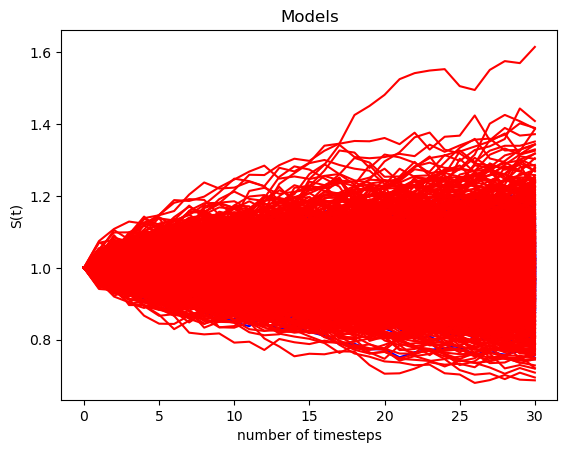

In [152]:
# as in https://perswww.kuleuven.be/~u0009713/ScSiTi03.pdf:
# Heston, NIG_CIR, VG_CIR, NIG_GammaOU, VG_GammaOU

np.random.seed(123)
n = 30
T = n/365
ttm = T
timegrid = np.linspace(0.0,T,n) # simulate on daily timegrid over 30 days
n_sims = 1000
S0 = 1.#24.6144
K = S0

model_GBM = GBM(0,0.4)
paths_GBM = model_GBM.simulate(timegrid, S0=S0, v0=0., M=n_sims,n=n,model_name='GBM')
price = model_GBM.compute_call_price(S0=S0,K=K,ttm=ttm)
print(price)

model = HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.2928, correlation_rho = -0.757,v0 = 0.0654)
paths_Heston = model.simulate(timegrid, S0=S0, v0=model.v0, M=n_sims,n=n,model_name='Heston')
price = model.compute_call_price(s0=S0, v0=model.v0,K=K,ttm=ttm)
print(price)

model = HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.065,
                  vol_of_vol = 0.2286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.0576)
paths_HestonWithJumps = model.simulate(timegrid, S0=S0, v0=model.v0, M=n_sims,n=n,model_name='Heston')
price = model.compute_call_price(s0=S0, v0=model.v0,K=K,ttm=ttm)
print(price)

model = BNS(rho =-4.675,lmbda=0.5474,b=18.6075,a=0.6069,v0 = 0.0433)
paths_BNS = model.simulate(timegrid, S0=S0, v0=model.v0, M=n_sims,n=n,model_name='BNS')
price = model.compute_call_price(s0=S0, v0=model.v0,K=K,ttm=ttm)
print(price)

plt.figure()
plt.plot(paths_Heston[:,:], color = 'blue')
#plt.plot(paths_HestonWithJumps[:,:], color = 'cyan')
#plt.plot(paths_BNS[:,:],color='grey')
plt.plot(paths_GBM,color='red')

plt.xlabel('number of timesteps')
plt.ylabel('S(t)')
plt.title('Models')

In [2]:
import datetime as dt
import sys
sys.path.insert(0,'../..')
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import numpy as np
import pandas as pd
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import plotly.express as px
import plotly
plotly.offline.init_notebook_mode()
import plotly.graph_objects as go

from rivapy.tools.datetime_grid import DateTimeGrid

from rivapy.instruments.specifications import EuropeanVanillaSpecification
from rivapy.pricing.vanillaoption_pricing import VanillaOptionDeepHedgingPricer, DeepHedgeModelwEmbedding

import analysis

In [3]:
repo = analysis.Repo('./test_models/')
key_list = list(repo.results.keys())
print(key_list[-1])

daebb09023d07c3682dc5f3da9c02a32d1adbe16


In [20]:
repo.results['65b883a4ea561bad06fb89e152fa6cf68bf51125']['pricing_param']

{'depth': 3,
 'nb_neurons': 64,
 'n_sims': 400000,
 'regularization': 0.0,
 'epochs': 100,
 'verbose': 1,
 'tensorboard_logdir': 'logs/20240529T113205',
 'initial_lr': 0.005,
 'decay_steps': 16000,
 'batch_size': 64,
 'decay_rate': 0.95,
 'seed': 42,
 'days': 30}

## Vanilla Call Option, GBM model with different volatility parameters (in 0.1,0.2,0.3,0.4)

In [64]:
repo.results['2373b4276543ac7d110bf71d9be022d078283503'].keys()


dict_keys(['val_date', 'spec', 'model', 'pricing_param', 'spec_hash', 'model_hash', 'pricing_params_hash', 'pnl_result'])

In [4]:
def setup(ref_keys,model,emb):
    sim_results = {}
    paths = {}
    pnl = {}
    delta = {}
    payoff = {}

    # simulate paths
    print('simulate paths')
    k =ref_keys
    sim_results[k], emb_vec = repo.simulate_model(k, n_sims=5000, days = 30, freq='D',model=model,emb=emb)
    paths = {k:{'ADS':sim_results[k]}}
    additional_states_ = {}
    additional_states_["emb_key"] = emb_vec
    paths[k].update(additional_states_) 

    # load models and specs
    print('load models and specs')
    get_hedge_model = repo.get_hedge_model(k)
    hedge_models = {k: get_hedge_model[0]}
    embeddings = {k: get_hedge_model[1]}
    specs = {k: EuropeanVanillaSpecification.from_dict(repo.results[k]['spec'][0])}
    #print(specs)
    print('compute delta and pnl')
    for k,v in hedge_models.items():
        pnl[k] = compute_pnl(5000, specs[k], paths[k], hedge_models[k])
        delta[k] = compute_delta(paths[k], 28, hedge_models[k])
        #payoff[k] = compute_payoff(5000, specs[k], paths[k])
        
    return sim_results, hedge_models, paths,specs, pnl, embeddings, delta#, payoff 

def compute_pnl(n_sims, specs, paths, hedge_model):
    pnl = {}
    delta = {}
    payoff = np.zeros((n_sims,))
    #for k in paths.keys():
    v = paths['ADS']
    payoff -= np.maximum(v[-1,:] - specs.strike,0)
    pnl = hedge_model.compute_pnl(paths, payoff)
    return pnl

def compute_delta(paths, t, hedge_model):
    print(paths)
    delta = hedge_model.compute_delta(paths,t).reshape((-1,))
    return delta 

experiments = {}
key_list = []
for k,v in repo.results.items():  
        key_list.append(k)

tmp={
        'ref_keys':key_list[-1],
        'labels':{ key_list[-1]: 'Test1'                
        }
}
experiments['test1'] = tmp

experiment = 'test1'
ref_keys = experiments[experiment]['ref_keys']
labels = experiments[experiment]['labels']
labels_T = {k:v for v,k in labels.items()}
model_list = [GBM(drift=0.0, volatility=0.1), GBM(drift=0.0, volatility=0.2),GBM(drift=0.0, volatility=0.3),GBM(drift=0.0, volatility=0.4)]#,
         #GBM(drift=0.0, volatility=0.5),GBM(drift=0.0, volatility=0.6),GBM(drift=0.0, volatility=0.7),GBM(drift=0.0, volatility=0.8)]
sim_results_list = []
hedge_models_list = []
paths_list = []
specs_list = []
pnl_list = []
embedding_list = []
delta_list = []
count = 0
for i in model_list:
    sim_results,hedge_models,paths,specs,pnl,embeddings,delta= setup(ref_keys,i,count)
    sim_results_list.append(sim_results)
    hedge_models_list.append(hedge_models)
    paths_list.append(paths)
    specs_list.append(specs)
    pnl_list.append(pnl)
    embedding_list.append(embeddings)
    delta_list.append(delta)
    count = count + 1
#sim_results,hedge_models,specs, paths,delta,pnl  = setup(ref_keys)

simulate paths
load models and specs
compute delta and pnl
157/157 [==============================] - 3s 2ms/step
{'ADS': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.00263366, 0.99678768, 0.99743813, ..., 0.99510875, 1.00192475,
        1.0033274 ],
       [1.00188171, 1.00665137, 0.99643863, ..., 0.99321545, 0.99254883,
        1.00196584],
       ...,
       [0.97463182, 0.9736485 , 1.00175039, ..., 1.01154202, 0.98965063,
        1.03126139],
       [0.97150651, 0.97535328, 0.99891499, ..., 1.01165315, 0.99261352,
        1.03207934],
       [0.96998529, 0.98041808, 1.00163405, ..., 1.01159628, 0.9972961 ,
        1.0362923 ]]), 'emb_key': array([0., 0., 0., ..., 0., 0., 0.])}
[array([[1.        , 1.00263366, 1.00188171, ..., 0.97463182, 0.97150651,
        0.96998529],
       [1.        , 0.99678768, 1.00665137, ..., 0.9736485 , 0.97535328,
        0.98041808],
       [1.        , 0.99743813, 0.99643863, ..., 1.00175039, 0

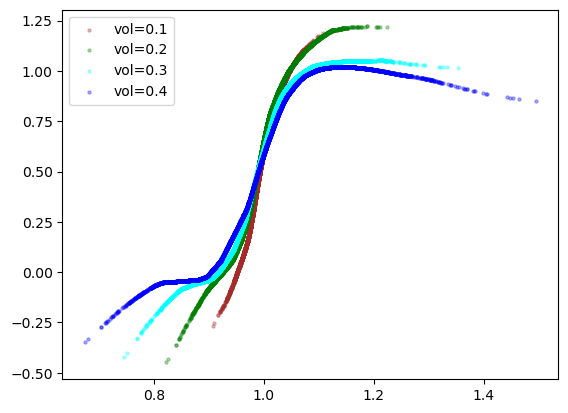

In [5]:
colors = ['brown','green','cyan','blue']#,'purple','red','orange','yellow']
vol = [0.1,0.2,0.3,0.4]#,0.5,0.6,0.7,0.8]
for i in range(4):
    paths = paths_list[i][key_list[-1]]['ADS'][28,:]
    df_delta = delta_list[i][key_list[-1]]
    plt.scatter(x = paths_list[i][key_list[-1]]['ADS'][28,:], y =df_delta, s = 5,label='vol='+str(vol[i]), alpha=0.3,color=colors[i])
plt.legend()

In [21]:
embedding_list[0][key_list[-1]]

(array([[-0.52985424],
        [-0.3257229 ],
        [-0.11883825],
        [ 0.07044698],
        [ 0.00076723]], dtype=float32),)

In [35]:
print(w)

[[-0.52985424]
 [-0.3257229 ]
 [-0.11883825]
 [ 0.07044698]
 [ 0.00076723]]


Text(0, 0.5, 'Embedding')

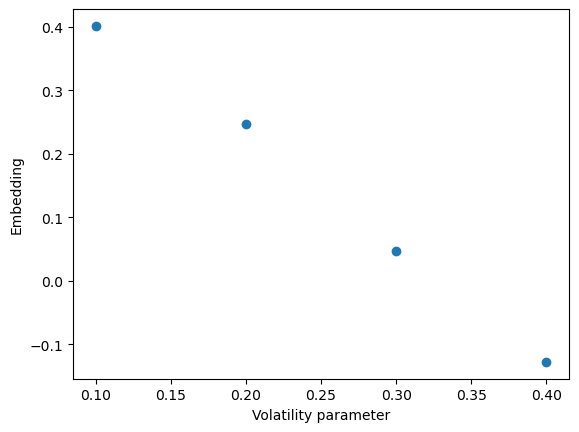

In [6]:
(w,) = embedding_list[0][key_list[-1]]
vol = [0.1,0.2,0.3,0.4,0.5]#,0.6,0.7,0.8,0.9]
plt.scatter(vol[:-1],w[:-1])
plt.xlabel('Volatility parameter')
plt.ylabel('Embedding')

(-0.25, 0.0)

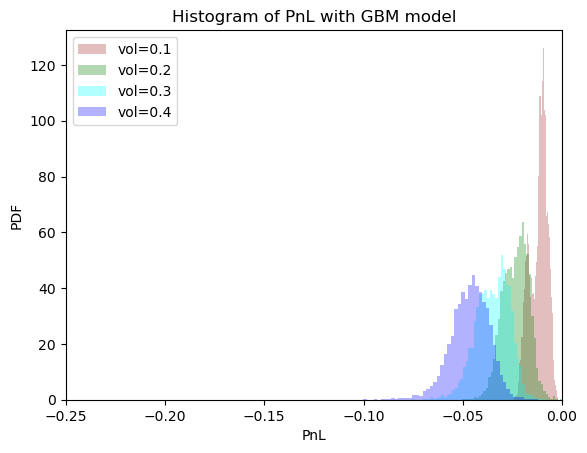

In [7]:
colors = ['brown','green','cyan','blue']#,'purple','red','orange','yellow']
vol = [0.1,0.2,0.3,0.4]#,0.5,0.6,0.7,0.8]
pnl_statistics = {}
for i in range(len(colors)):
    df_pnl = pd.DataFrame.from_dict(pnl_list[i][key_list[-1]])
    plt.hist(df_pnl, bins=50, label='vol='+str(vol[i]), alpha=0.3,color=colors[i],density = True)
plt.legend()
plt.title('Histogram of PnL with GBM model')
plt.xlabel('PnL')
plt.ylabel('PDF')
plt.xlim([-0.25,0.0])

In [25]:
pnl_statistics = []
for i in range(len(vol)):
    df_pnl = pd.DataFrame.from_dict(pnl_list[i][key_list[-1]])
    pnl_statistics.append({str(vol[i]): {"mean": df_pnl.mean(),
            "var": df_pnl.var(),
            "1%": np.percentile(df_pnl, 1),
            "99%": np.percentile(df_pnl, 99),
            "5%": np.percentile(df_pnl, 5),
            "95%": np.percentile(df_pnl, 95) }})


pnl_statistics[0]

{'0.1': {'mean': 0   -0.01165
  dtype: float64,
  'var': 0    0.000014
  dtype: float64,
  '1%': -0.020255458056926728,
  '99%': -0.004511784545122841,
  '5%': -0.018005992844700815,
  '95%': -0.005972604730217266}}

In [8]:
def compute_payoff(n_sims, strike, paths):
    payoff = np.zeros((n_sims,))
    #for k in paths.keys():
    v = paths['ADS']
    payoff -= np.maximum(v[-1,:] - strike,0)
    return payoff

In [19]:
model_vol01= hedge_models_list[0][key_list[-1]]

sim_results, emb_vec = repo.simulate_model('ADS', n_sims=50000, days = 30, freq='D',model= GBM(drift=0.0, volatility=0.25),emb=4)
hedge_ins = {}
hedge_ins['ADS'] = sim_results

additional_states_ = {}
additional_states_["emb_key"] = emb_vec

paths = {}
paths.update(hedge_ins)
paths.update(additional_states_) 

print(paths)

payoff = compute_payoff(50000,1.,paths)

                    
pnl_vol09 = model_vol01.train_task(model=model_vol01, paths=paths, payoff=payoff)

{'ADS': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.00654367, 0.99193583, 0.99355482, ..., 1.00726588, 0.9965448 ,
        0.99861903],
       [1.00460415, 1.01660342, 0.99101501, ..., 0.99679576, 1.00705607,
        0.98783246],
       ...,
       [0.93638674, 0.93402669, 1.00288837, ..., 0.89788913, 1.09356623,
        0.98638635],
       [0.92884876, 0.93807071, 0.99575394, ..., 0.91931331, 1.10298425,
        0.98111595],
       [0.92516779, 0.95024571, 1.00249065, ..., 0.90971597, 1.10763235,
        1.00526923]]), 'emb_key': array([4., 4., 4., ..., 4., 4., 4.])}
Epoch 1/10
704/704 [==============================] - 5s 2ms/step - loss: 0.0016
Epoch 2/10
704/704 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 3/10
704/704 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 4/10
704/704 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 5/10
704/704 [=====================

KeyboardInterrupt: 

(-0.25, 0.0)

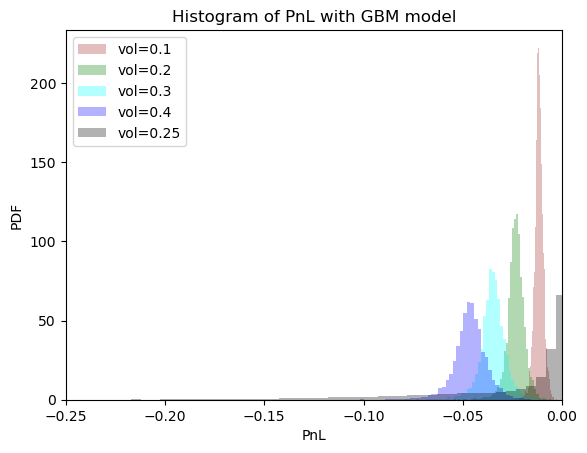

In [45]:
colors = ['brown','green','cyan','blue']#,'purple','red','orange','yellow']
vol = [0.1,0.2,0.3,0.4]#,0.5,0.6,0.7,0.8]
pnl_statistics = {}
for i in range(len(colors)):
    df_pnl = pd.DataFrame.from_dict(pnl_list[i][key_list[2]])
    plt.hist(df_pnl, bins=50, label='vol='+str(vol[i]), alpha=0.3,color=colors[i],density = True)

plt.hist(pnl_vol09,bins=50, label='vol=0.25', alpha=0.3,color='black',density = True)
plt.legend()
plt.title('Histogram of PnL with GBM model')
plt.xlabel('PnL')
plt.ylabel('PDF')
plt.xlim([-0.25,0.0])

In [74]:
model_vol02= hedge_models_list[1][key_list[2]]

sim_results, emb_vec = repo.simulate_model('ADS', n_sims=5000, days = 30, freq='D',model= GBM(drift=0.0, volatility=0.25),emb=4)
hedge_ins = {}
hedge_ins['ADS'] = sim_results

additional_states_ = {}
additional_states_["emb_key"] = emb_vec

paths = {}
paths.update(hedge_ins)
paths.update(additional_states_) 

print(paths)

payoff = compute_payoff(5000,1.,paths)


                    
pnl_vol025 = model_vol02.train_task(model=model_vol02, paths=paths, payoff=payoff)

{'ADS': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.00654367, 0.99193583, 0.99355482, ..., 0.98776421, 1.00476543,
        1.0082857 ],
       [1.00460415, 1.01660342, 0.99101501, ..., 0.98302034, 0.98137174,
        1.00481505],
       ...,
       [0.93638674, 0.93402669, 1.00288837, ..., 1.02757518, 0.97287838,
        1.0783896 ],
       [0.92884876, 0.93807071, 0.99575394, ..., 1.02780282, 0.98012435,
        1.08047177],
       [0.92516779, 0.95024571, 1.00249065, ..., 1.02760377, 0.99167172,
        1.09147379]]), 'emb_key': array([4., 4., 4., ..., 4., 4., 4.])}
model
<keras.engine.functional.Functional object at 0x0000022E216FBFD0> False
emb_key
<keras.engine.input_layer.InputLayer object at 0x0000022E21701690> False
ADS
<keras.engine.input_layer.InputLayer object at 0x0000022E21701790> False
ttm
<keras.engine.input_layer.InputLayer object at 0x0000022E21702090> False
Embedding
<keras.layers.core.embedding.Embedding obj

ValueError: in user code:

    File "c:\Users\Anwender\.conda\envs\rivapyFS\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Anwender\.conda\envs\rivapyFS\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Anwender\.conda\envs\rivapyFS\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Anwender\.conda\envs\rivapyFS\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Anwender\.conda\envs\rivapyFS\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Anwender\.conda\envs\rivapyFS\Lib\site-packages\keras\engine\input_spec.py", line 219, in assert_input_compatibility
        raise ValueError(

    ValueError: Layer "model" expects 3 input(s), but it received 2 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(None, 31) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(None,) dtype=float32>]


(-0.25, 0.0)

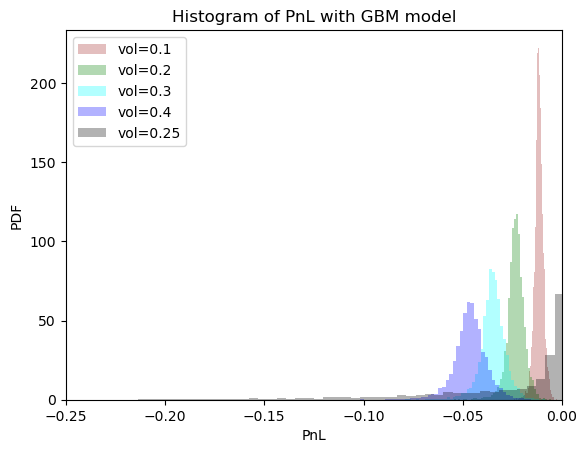

In [72]:
colors = ['brown','green','cyan','blue']#,'purple','red','orange','yellow']
vol = [0.1,0.2,0.3,0.4]#,0.5,0.6,0.7,0.8]
pnl_statistics = {}
for i in range(len(colors)):
    df_pnl = pd.DataFrame.from_dict(pnl_list[i][key_list[2]])
    plt.hist(df_pnl, bins=50, label='vol='+str(vol[i]), alpha=0.3,color=colors[i],density = True)

plt.hist(pnl_vol025,bins=50, label='vol=0.25', alpha=0.3,color='black',density = True)
plt.legend()
plt.title('Histogram of PnL with GBM model')
plt.xlabel('PnL')
plt.ylabel('PDF')
plt.xlim([-0.25,0.0])

In [22]:
model_vol03= hedge_models_list[2][key_list[2]]

sim_results, emb_vec = repo.simulate_model('ADS', n_sims=500, days = 30, freq='D',model= GBM(drift=0.0, volatility=0.25),emb=4)
hedge_ins = {}
hedge_ins['ADS'] = sim_results

additional_states_ = {}
additional_states_["emb_key"] = emb_vec

paths = {}
paths.update(hedge_ins)
paths.update(additional_states_) 

print(paths)

payoff = compute_payoff(500,1.,paths)


                    
pnl_vol025 = model_vol03.train_task(model=model_vol03, paths=paths, payoff=payoff)

{'ADS': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.00654367, 0.99193583, 0.99355482, ..., 0.99515324, 0.99619254,
        1.00575773],
       [1.00460415, 1.01660342, 0.99101501, ..., 0.97028442, 0.9976002 ,
        1.00215707],
       ...,
       [0.93638674, 0.93402669, 1.00288837, ..., 1.04831078, 1.06428448,
        1.07667778],
       [0.92884876, 0.93807071, 0.99575394, ..., 1.03783333, 1.06861326,
        1.06398865],
       [0.92516779, 0.95024571, 1.00249065, ..., 1.03671638, 1.07773506,
        1.0617191 ]]), 'emb_key': array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4

(-0.25, 0.0)

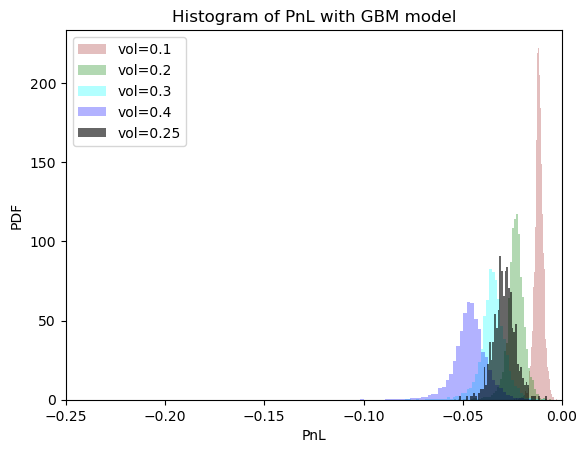

In [23]:
colors = ['brown','green','cyan','blue']#,'purple','red','orange','yellow']
vol = [0.1,0.2,0.3,0.4]#,0.5,0.6,0.7,0.8]
pnl_statistics = {}
for i in range(len(colors)):
    df_pnl = pd.DataFrame.from_dict(pnl_list[i][key_list[2]])
    plt.hist(df_pnl, bins=50, label='vol='+str(vol[i]), alpha=0.3,color=colors[i],density = True)

plt.hist(pnl_vol025,bins=50, label='vol=0.25', alpha=0.6,color='black',density = True)
plt.legend()
plt.title('Histogram of PnL with GBM model')
plt.xlabel('PnL')
plt.ylabel('PDF')
plt.xlim([-0.25,0.0])

In [24]:
model_vol04= hedge_models_list[3][key_list[2]]

sim_results, emb_vec = repo.simulate_model('ADS', n_sims=50, days = 30, freq='D',model= GBM(drift=0.0, volatility=0.25),emb=4)
hedge_ins = {}
hedge_ins['ADS'] = sim_results

additional_states_ = {}
additional_states_["emb_key"] = emb_vec

paths = {}
paths.update(hedge_ins)
paths.update(additional_states_) 

print(paths)

payoff = compute_payoff(50,1.,paths)


                    
pnl_vol025 = model_vol04.train_task(model=model_vol04, paths=paths, payoff=payoff)

{'ADS': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.00654367, 0.99193583, 0.99355482, ..., 1.01774436, 1.00877217,
        1.01596384],
       [1.00460415, 1.01660342, 0.99101501, ..., 1.0252159 , 1.02456022,
        1.00766261],
       ...,
       [0.93638674, 0.93402669, 1.00288837, ..., 1.10777354, 1.112436  ,
        1.09698322],
       [0.92884876, 0.93807071, 0.99575394, ..., 1.11493727, 1.09477325,
        1.11193848],
       [0.92516779, 0.95024571, 1.00249065, ..., 1.12579593, 1.10117308,
        1.12064277]]), 'emb_key': array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])}
Epoch 1/500
1/1 [==============================] - 8s 8s/step - loss: 0.0023
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 3/500
1/1 [========

(-0.25, 0.0)

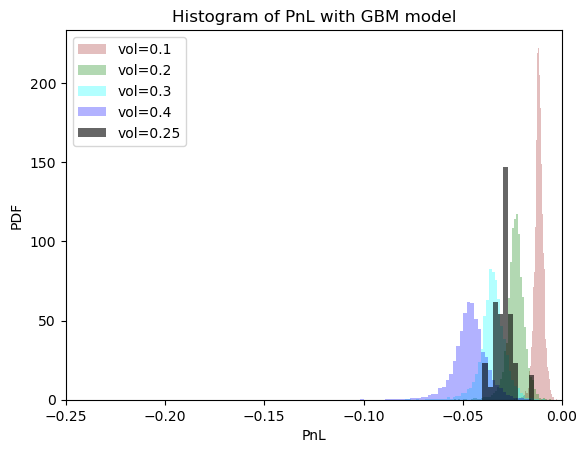

In [26]:
colors = ['brown','green','cyan','blue']#,'purple','red','orange','yellow']
vol = [0.1,0.2,0.3,0.4]#,0.5,0.6,0.7,0.8]
pnl_statistics = {}
for i in range(len(colors)):
    df_pnl = pd.DataFrame.from_dict(pnl_list[i][key_list[2]])
    plt.hist(df_pnl, bins=50, label='vol='+str(vol[i]), alpha=0.3,color=colors[i],density = True)

plt.hist(pnl_vol025,bins=10, label='vol=0.25', alpha=0.6,color='black',density = True)
plt.legend()
plt.title('Histogram of PnL with GBM model')
plt.xlabel('PnL')
plt.ylabel('PDF')
plt.xlim([-0.25,0.0])

t-SNE

In [156]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=1, n_iter=15000, metric="euclidean",perplexity=2)
embs = tsne.fit_transform(w)
plt.scatter(embs[:, 0], embs[:, 1],marker='o');
plt.title('Dimensionality reduced embeddings using t-SNE')


AttributeError: 'NoneType' object has no attribute 'split'

## Vanilla Call Option, Heston model with different volatility parameters (v0) (in 0.009,0.04,0.09,0.16)

In [96]:
def setup(ref_keys,model,emb):
    sim_results = {}
    paths = {}
    pnl = {}
    delta = {}
    payoff = {}

    # simulate paths
    print('simulate paths')
    k =ref_keys
    sim_results[k], emb_vec = repo.simulate_model(k, n_sims=5000, days = 30, freq='D',model=model,emb=emb)
    paths = {k:{'ADS':sim_results[k]}}
    additional_states_ = {}
    additional_states_["emb_key"] = emb_vec
    paths[k].update(additional_states_) 

    # load models and specs
    print('load models and specs')
    get_hedge_model = repo.get_hedge_model(k)
    hedge_models = {k: get_hedge_model[0]}
    embeddings = {k: get_hedge_model[1]}
    specs = {k: EuropeanVanillaSpecification.from_dict(repo.results[k]['spec'][0])}
    #print(specs)
    print('compute delta and pnl')
    for k,v in hedge_models.items():
        pnl[k] = compute_pnl(5000, specs[k], paths[k], hedge_models[k])
        delta[k] = compute_delta(paths[k], 28, hedge_models[k])
        #payoff[k] = compute_payoff(5000, specs[k], paths[k])
        
    return sim_results, hedge_models, paths,specs, pnl, embeddings, delta#, payoff 

def compute_pnl(n_sims, specs, paths, hedge_model):
    pnl = {}
    delta = {}
    payoff = np.zeros((n_sims,))
    #for k in paths.keys():
    v = paths['ADS']
    payoff -= np.maximum(v[-1,:] - specs.strike,0)
    pnl = hedge_model.compute_pnl(paths, payoff)
    return pnl

def compute_delta(paths, t, hedge_model):
    print(paths)
    delta = hedge_model.compute_delta(paths,t).reshape((-1,))
    return delta 

experiments = {}
key_list = []
for k,v in repo.results.items():  
        key_list.append(k)

tmp={
        'ref_keys':key_list[3],
        'labels':{ key_list[3]: 'Test1'                
        }
}
experiments['test1'] = tmp

experiment = 'test1'
ref_keys = experiments[experiment]['ref_keys']
labels = experiments[experiment]['labels']
labels_T = {k:v for v,k in labels.items()}
model_list = [HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.2928, correlation_rho = -0.757,v0 = 0.009),
                  HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.2928, correlation_rho = -0.757,v0 = 0.04),
                  HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.2928, correlation_rho = -0.757,v0 = 0.09),
                  HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.2928, correlation_rho = -0.757,v0 = 0.16)]#,
         #GBM(drift=0.0, volatility=0.5),GBM(drift=0.0, volatility=0.6),GBM(drift=0.0, volatility=0.7),GBM(drift=0.0, volatility=0.8)]
sim_results_list = []
hedge_models_list = []
paths_list = []
specs_list = []
pnl_list = []
embedding_list = []
delta_list = []
count = 0
for i in model_list:
    sim_results,hedge_models,paths,specs,pnl,embeddings,delta= setup(ref_keys,i,count)
    sim_results_list.append(sim_results)
    hedge_models_list.append(hedge_models)
    paths_list.append(paths)
    specs_list.append(specs)
    pnl_list.append(pnl)
    embedding_list.append(embeddings)
    delta_list.append(delta)
    count = count + 1
#sim_results,hedge_models,specs, paths,delta,pnl  = setup(ref_keys)

simulate paths
load models and specs
compute delta and pnl
157/157 [==============================] - 3s 2ms/step
{'ADS': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.00249903, 0.99928919, 1.00326373, ..., 1.01583311, 1.00407654,
        0.99571328],
       [1.00024026, 0.99697079, 0.99507328, ..., 1.01368261, 1.00613613,
        0.99899544],
       ...,
       [1.0336266 , 1.00603974, 0.99489661, ..., 1.00437323, 1.0230977 ,
        0.99488659],
       [1.03198349, 1.00050827, 0.99659183, ..., 1.00007398, 1.0271844 ,
        0.99751202],
       [1.02933018, 0.99389487, 0.99595007, ..., 0.99923562, 1.02781103,
        1.00114802]]), 'emb_key': array([0., 0., 0., ..., 0., 0., 0.])}
[array([[1.        , 1.00249903, 1.00024026, ..., 1.0336266 , 1.03198349,
        1.02933018],
       [1.        , 0.99928919, 0.99697079, ..., 1.00603974, 1.00050827,
        0.99389487],
       [1.        , 1.00326373, 0.99507328, ..., 0.99489661, 0

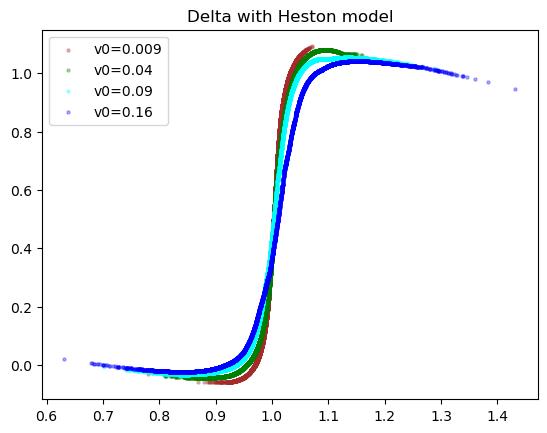

In [97]:
colors = ['brown','green','cyan','blue']#,'purple','red','orange','yellow']
vol = [0.009,0.04,0.09,0.16,0.5]#,0.5,0.6,0.7,0.8]
for i in range(4):
    paths = paths_list[i][key_list[3]]['ADS'][28,:]
    df_delta = delta_list[i][key_list[3]]
    plt.scatter(x = paths_list[i][key_list[3]]['ADS'][28,:], y =df_delta, s = 5,label='v0='+str(vol[i]), alpha=0.3,color=colors[i])
plt.title('Delta with Heston model')
plt.legend()

Text(0, 0.5, 'Embedding')

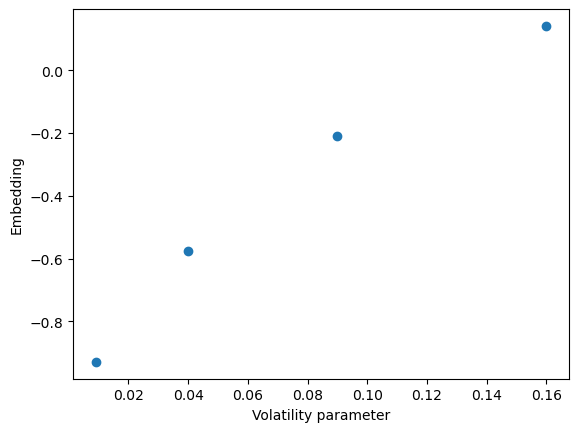

In [98]:
(w,) = embedding_list[0][key_list[3]]
vol = [0.009,0.04,0.09,0.16,0.5]#,0.6,0.7,0.8,0.9]
plt.scatter(vol[:-1],w[:-1])
plt.xlabel('Volatility parameter')
plt.ylabel('Embedding')

(-0.25, 0.0)

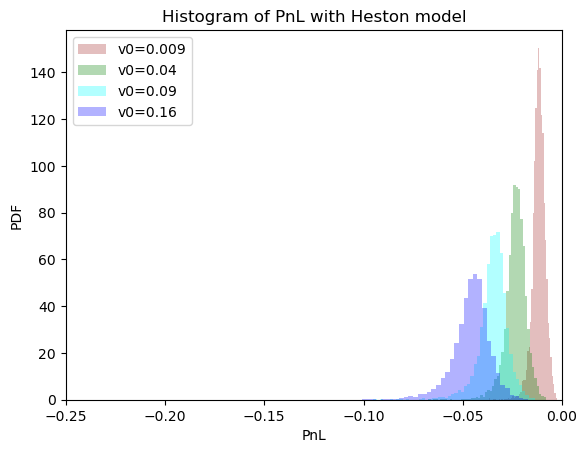

In [100]:
colors = ['brown','green','cyan','blue']#,'purple','red','orange','yellow']
vol = [0.009,0.04,0.09,0.16]#,0.5,0.6,0.7,0.8]
pnl_statistics = {}
for i in range(len(colors)):
    df_pnl = pd.DataFrame.from_dict(pnl_list[i][key_list[3]])
    plt.hist(df_pnl, bins=50, label='v0='+str(vol[i]), alpha=0.3,color=colors[i],density = True)
plt.legend()
plt.title('Histogram of PnL with Heston model')
plt.xlabel('PnL')
plt.ylabel('PDF')
plt.xlim([-0.25,0.0])

In [102]:
model_voltest= hedge_models_list[0][key_list[3]]

sim_results, emb_vec = repo.simulate_model('ADS', n_sims=50000, days = 30, freq='D',model= HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.2928, correlation_rho = -0.757,v0 = 0.0654),emb=4)
hedge_ins = {}
hedge_ins['ADS'] = sim_results

additional_states_ = {}
additional_states_["emb_key"] = emb_vec

paths = {}
paths.update(hedge_ins)
paths.update(additional_states_) 

print(paths)

payoff = compute_payoff(50000,1.,paths)


                    
pnl_vol00654 = model_voltest.train_task(model=model_voltest, paths=paths, payoff=payoff)

{'ADS': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.00669217, 0.99802686, 1.0087635 , ..., 1.00673836, 1.00352431,
        1.02075693],
       [1.00792908, 0.99705933, 1.02147324, ..., 1.01227363, 1.00056229,
        1.02229929],
       ...,
       [1.16674582, 1.02306321, 0.92346999, ..., 1.00386918, 0.96211898,
        1.00301315],
       [1.16215035, 1.0217804 , 0.91003546, ..., 1.02009153, 0.96432905,
        0.97547744],
       [1.16437164, 1.02869221, 0.90071746, ..., 1.00947083, 0.9593464 ,
        1.0053953 ]]), 'emb_key': array([4., 4., 4., ..., 4., 4., 4.])}
Epoch 1/100
704/704 [==============================] - 14s 6ms/step - loss: 3.7135e-05
Epoch 2/100
704/704 [==============================] - 4s 6ms/step - loss: 3.7731e-05
Epoch 3/100
704/704 [==============================] - 4s 6ms/step - loss: 3.6931e-05
Epoch 4/100
704/704 [==============================] - 4s 6ms/step - loss: 3.7112e-05
Epoch 5/100
704/704 

(-0.25, 0.0)

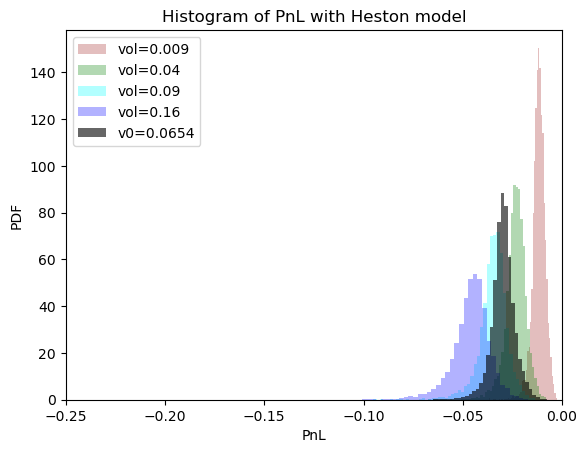

In [106]:
colors = ['brown','green','cyan','blue']#,'purple','red','orange','yellow']
vol = [0.009,0.04,0.09,0.16]#,0.5,0.6,0.7,0.8]
pnl_statistics = {}
for i in range(len(colors)):
    df_pnl = pd.DataFrame.from_dict(pnl_list[i][key_list[3]])
    plt.hist(df_pnl, bins=50, label='vol='+str(vol[i]), alpha=0.3,color=colors[i],density = True)

plt.hist(pnl_vol00654,bins=50, label='v0=0.0654', alpha=0.6,color='black',density = True)
plt.legend()
plt.title('Histogram of PnL with Heston model')
plt.xlabel('PnL')
plt.ylabel('PDF')
plt.xlim([-0.25,0.0])

## Vanilla Call Option, Heston model with Jumps with different volatility parameters (v0 in 0.007,0.032,0.085,0.15)

In [130]:
def setup(ref_keys,model,emb):
    sim_results = {}
    paths = {}
    pnl = {}
    delta = {}
    payoff = {}

    # simulate paths
    print('simulate paths')
    k =ref_keys
    sim_results[k], emb_vec = repo.simulate_model(k, n_sims=5000, days = 30, freq='D',model=model,emb=emb)
    paths = {k:{'ADS':sim_results[k]}}
    additional_states_ = {}
    additional_states_["emb_key"] = emb_vec
    paths[k].update(additional_states_) 

    # load models and specs
    print('load models and specs')
    get_hedge_model = repo.get_hedge_model(k)
    hedge_models = {k: get_hedge_model[0]}
    embeddings = {k: get_hedge_model[1]}
    specs = {k: EuropeanVanillaSpecification.from_dict(repo.results[k]['spec'][0])}
    #print(specs)
    print('compute delta and pnl')
    for k,v in hedge_models.items():
        pnl[k] = compute_pnl(5000, specs[k], paths[k], hedge_models[k])
        delta[k] = compute_delta(paths[k], 28, hedge_models[k])
        #payoff[k] = compute_payoff(5000, specs[k], paths[k])
        
    return sim_results, hedge_models, paths,specs, pnl, embeddings, delta#, payoff 

def compute_pnl(n_sims, specs, paths, hedge_model):
    pnl = {}
    delta = {}
    payoff = np.zeros((n_sims,))
    #for k in paths.keys():
    v = paths['ADS']
    payoff -= np.maximum(v[-1,:] - specs.strike,0)
    pnl = hedge_model.compute_pnl(paths, payoff)
    return pnl

def compute_delta(paths, t, hedge_model):
    print(paths)
    delta = hedge_model.compute_delta(paths,t).reshape((-1,))
    return delta 

experiments = {}
key_list = []
for k,v in repo.results.items():  
        key_list.append(k)

tmp={
        'ref_keys':key_list[4],
        'labels':{ key_list[4]: 'Test1'                
        }
}
experiments['test1'] = tmp

experiment = 'test1'
ref_keys = experiments[experiment]['ref_keys']
labels = experiments[experiment]['labels']
labels_T = {k:v for v,k in labels.items()}
model_list =  [HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.065,
                  vol_of_vol = 0.2286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.007),
                  HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.065,
                  vol_of_vol = 0.2286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.032),
                  HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.065,
                  vol_of_vol = 0.2286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.085),
                  HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.065,
                  vol_of_vol = 0.2286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.15)]
         #GBM(drift=0.0, volatility=0.5),GBM(drift=0.0, volatility=0.6),GBM(drift=0.0, volatility=0.7),GBM(drift=0.0, volatility=0.8)]
sim_results_list = []
hedge_models_list = []
paths_list = []
specs_list = []
pnl_list = []
embedding_list = []
delta_list = []
count = 0
for i in model_list:
    sim_results,hedge_models,paths,specs,pnl,embeddings,delta= setup(ref_keys,i,count)
    sim_results_list.append(sim_results)
    hedge_models_list.append(hedge_models)
    paths_list.append(paths)
    specs_list.append(specs)
    pnl_list.append(pnl)
    embedding_list.append(embeddings)
    delta_list.append(delta)
    count = count + 1
#sim_results,hedge_models,specs, paths,delta,pnl  = setup(ref_keys)

simulate paths
load models and specs
compute delta and pnl
157/157 [==============================] - 2s 2ms/step
{'ADS': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.00214229, 0.999314  , 1.00281475, ..., 1.0137952 , 1.00352896,
        0.99615244],
       [1.00021074, 0.99719631, 0.99515167, ..., 1.01144656, 1.00550187,
        0.99910466],
       ...,
       [1.02169375, 1.00292135, 0.99528455, ..., 1.00213982, 1.017901  ,
        0.99451871],
       [1.02059294, 0.99856917, 0.99739704, ..., 0.99790985, 1.02131635,
        0.99732935],
       [1.01887286, 0.99295033, 0.99654947, ..., 0.99695398, 1.02177469,
        1.0010625 ]]), 'emb_key': array([0., 0., 0., ..., 0., 0., 0.])}
[array([[1.        , 1.00214229, 1.00021074, ..., 1.02169375, 1.02059294,
        1.01887286],
       [1.        , 0.999314  , 0.99719631, ..., 1.00292135, 0.99856917,
        0.99295033],
       [1.        , 1.00281475, 0.99515167, ..., 0.99528455, 0

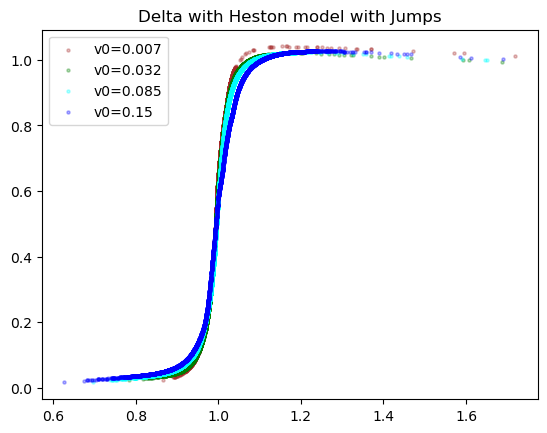

In [132]:
colors = ['brown','green','cyan','blue']#,'purple','red','orange','yellow']
vol = [0.007,0.032,0.085,0.15,0.5]#,0.5,0.6,0.7,0.8]
for i in range(4):
    paths = paths_list[i][key_list[4]]['ADS'][28,:]
    df_delta = delta_list[i][key_list[4]]
    plt.scatter(x = paths_list[i][key_list[4]]['ADS'][28,:], y =df_delta, s = 5,label='v0='+str(vol[i]), alpha=0.3,color=colors[i])
plt.title('Delta with Heston model with Jumps')
plt.legend()

Text(0, 0.5, 'Embedding')

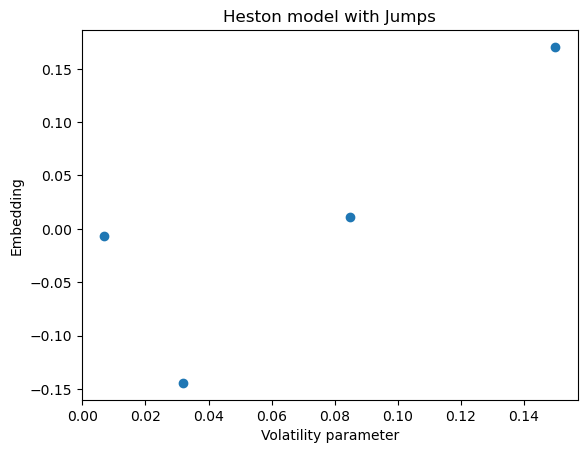

In [133]:
(w,) = embedding_list[0][key_list[4]]
vol = [0.007,0.032,0.085,0.15,0.5]#,0.6,0.7,0.8,0.9]
plt.scatter(vol[:-1],w[:-1])
plt.title('Heston model with Jumps')
plt.xlabel('Volatility parameter')
plt.ylabel('Embedding')

(-0.25, 0.0)

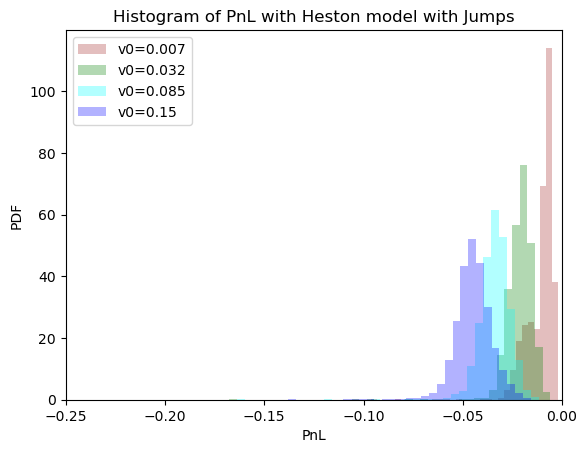

In [138]:
colors = ['brown','green','cyan','blue']#,'purple','red','orange','yellow']
vol = [0.007,0.032,0.085,0.15]#,0.5,0.6,0.7,0.8]
pnl_statistics = {}
for i in range(len(colors)):
    df_pnl = pd.DataFrame.from_dict(pnl_list[i][key_list[4]])
    plt.hist(df_pnl, bins=100, label='v0='+str(vol[i]), alpha=0.3,color=colors[i],density = True)
plt.legend()
plt.title('Histogram of PnL with Heston model with Jumps')
plt.xlabel('PnL')
plt.ylabel('PDF')
plt.xlim([-0.25,0.0])

In [137]:
model_voltest= hedge_models_list[0][key_list[4]]

sim_results, emb_vec = repo.simulate_model('ADS', n_sims=50000, days = 30, freq='D',model= HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.065,
                  vol_of_vol = 0.2286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.0576),emb=4)
hedge_ins = {}
hedge_ins['ADS'] = sim_results

additional_states_ = {}
additional_states_["emb_key"] = emb_vec

paths = {}
paths.update(hedge_ins)
paths.update(additional_states_) 

print(paths)

payoff = compute_payoff(50000,1.,paths)


                    
pnl_vol00576 = model_voltest.train_task(model=model_voltest, paths=paths, payoff=payoff)

{'ADS': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.00627633, 0.99816326, 1.00820532, ..., 1.0063194 , 1.00331849,
        1.01929726],
       [1.00745203, 0.99727259, 1.02016913, ..., 1.01145583, 1.00055861,
        1.02073267],
       ...,
       [1.15020196, 1.02126577, 0.92541197, ..., 1.00412038, 0.95939804,
        0.99662912],
       [1.14619254, 1.02004165, 0.91196697, ..., 1.0184939 , 0.96176149,
        0.97363631],
       [1.14811322, 1.02671468, 0.9026029 , ..., 1.00914538, 0.95658661,
        0.9980965 ]]), 'emb_key': array([4., 4., 4., ..., 4., 4., 4.])}
Epoch 1/100
704/704 [==============================] - 10s 6ms/step - loss: 2.0403e-04
Epoch 2/100
704/704 [==============================] - 4s 6ms/step - loss: 2.9288e-04
Epoch 3/100
704/704 [==============================] - 4s 6ms/step - loss: 2.2922e-04
Epoch 4/100
704/704 [==============================] - 4s 6ms/step - loss: 2.1236e-04
Epoch 5/100
704/704 

(-0.25, 0.0)

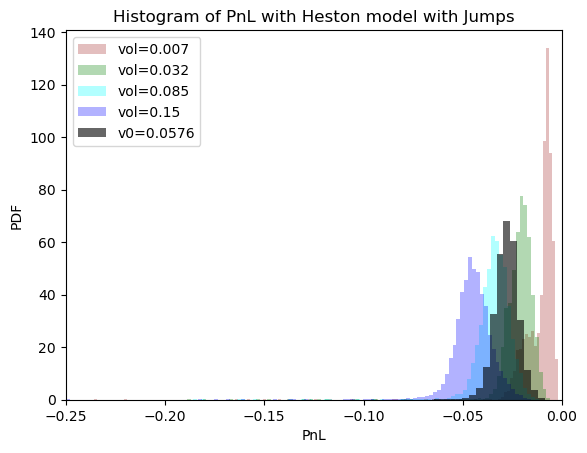

In [142]:
colors = ['brown','green','cyan','blue']#,'purple','red','orange','yellow']
vol = [0.007,0.032,0.085,0.15]#,0.5,0.6,0.7,0.8]
pnl_statistics = {}
for i in range(len(colors)):
    df_pnl = pd.DataFrame.from_dict(pnl_list[i][key_list[4]])
    plt.hist(df_pnl, bins=200, label='vol='+str(vol[i]), alpha=0.3,color=colors[i],density = True)

plt.hist(pnl_vol00576,bins=200, label='v0=0.0576', alpha=0.6,color='black',density = True)
plt.legend()
plt.title('Histogram of PnL with Heston model with Jumps')
plt.xlabel('PnL')
plt.ylabel('PDF')
plt.xlim([-0.25,0.0])

## Vanilla Call Option, BNS model with different volatility parameters (v0 in 0.006,0.033,0.08,0.015)

In [161]:
def setup(ref_keys,model,emb):
    sim_results = {}
    paths = {}
    pnl = {}
    delta = {}
    payoff = {}

    # simulate paths
    print('simulate paths')
    k =ref_keys
    sim_results[k], emb_vec = repo.simulate_model(k, n_sims=50000, days = 30, freq='D',model=model,emb=emb)
    paths = {k:{'ADS':sim_results[k]}}
    additional_states_ = {}
    additional_states_["emb_key"] = emb_vec
    paths[k].update(additional_states_) 

    # load models and specs
    print('load models and specs')
    get_hedge_model = repo.get_hedge_model(k)
    hedge_models = {k: get_hedge_model[0]}
    embeddings = {k: get_hedge_model[1]}
    specs = {k: EuropeanVanillaSpecification.from_dict(repo.results[k]['spec'][0])}
    #print(specs)
    print('compute delta and pnl')
    for k,v in hedge_models.items():
        pnl[k] = compute_pnl(50000, specs[k], paths[k], hedge_models[k])
        delta[k] = compute_delta(paths[k], 28, hedge_models[k])
        #payoff[k] = compute_payoff(5000, specs[k], paths[k])
        
    return sim_results, hedge_models, paths,specs, pnl, embeddings, delta#, payoff 

def compute_pnl(n_sims, specs, paths, hedge_model):
    pnl = {}
    delta = {}
    payoff = np.zeros((n_sims,))
    #for k in paths.keys():
    v = paths['ADS']
    payoff -= np.maximum(v[-1,:] - specs.strike,0)
    pnl = hedge_model.compute_pnl(paths, payoff)
    return pnl

def compute_delta(paths, t, hedge_model):
    print(paths)
    delta = hedge_model.compute_delta(paths,t).reshape((-1,))
    return delta 

experiments = {}
key_list = []
for k,v in repo.results.items():  
        key_list.append(k)

tmp={
        'ref_keys':key_list[5],
        'labels':{ key_list[5]: 'Test1'                
        }
}
experiments['test1'] = tmp

experiment = 'test1'
ref_keys = experiments[experiment]['ref_keys']
labels = experiments[experiment]['labels']
labels_T = {k:v for v,k in labels.items()}
model_list =  [BNS(rho =-4.675,lmbda=0.5474,b=18.6075,a=0.6069,v0 = 0.006),
         BNS(rho =-4.675,lmbda=0.5474,b=18.6075,a=0.6069,v0 = 0.033),
         BNS(rho =-4.675,lmbda=0.5474,b=18.6075,a=0.6069,v0 = 0.08),
         BNS(rho =-4.675,lmbda=0.5474,b=18.6075,a=0.6069,v0 = 0.15)]
         #GBM(drift=0.0, volatility=0.5),GBM(drift=0.0, volatility=0.6),GBM(drift=0.0, volatility=0.7),GBM(drift=0.0, volatility=0.8)]
sim_results_list = []
hedge_models_list = []
paths_list = []
specs_list = []
pnl_list = []
embedding_list = []
delta_list = []
count = 0
for i in model_list:
    sim_results,hedge_models,paths,specs,pnl,embeddings,delta= setup(ref_keys,i,count)
    sim_results_list.append(sim_results)
    hedge_models_list.append(hedge_models)
    paths_list.append(paths)
    specs_list.append(specs)
    pnl_list.append(pnl)
    embedding_list.append(embeddings)
    delta_list.append(delta)
    count = count + 1
#sim_results,hedge_models,specs, paths,delta,pnl  = setup(ref_keys)

simulate paths
load models and specs
compute delta and pnl
1563/1563 [==============================] - 7s 3ms/step
{'ADS': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.00223136, 0.99961047, 1.00285553, ..., 1.00224529, 1.00127505,
        1.00645209],
       [1.00281808, 0.99952692, 1.00697815, ..., 1.00411787, 1.00058517,
        1.00713197],
       ...,
       [1.05938748, 1.0120582 , 0.98206124, ..., 1.00664152, 0.99231972,
        1.00338941],
       [1.05789597, 1.01186019, 0.97825847, ..., 1.01140906, 0.9932561 ,
        0.99651928],
       [1.05893677, 1.01427583, 0.97569593, ..., 1.00861023, 0.99185141,
        1.00409687]]), 'emb_key': array([0., 0., 0., ..., 0., 0., 0.])}
[array([[1.        , 1.00223136, 1.00281808, ..., 1.05938748, 1.05789597,
        1.05893677],
       [1.        , 0.99961047, 0.99952692, ..., 1.0120582 , 1.01186019,
        1.01427583],
       [1.        , 1.00285553, 1.00697815, ..., 0.98206124,

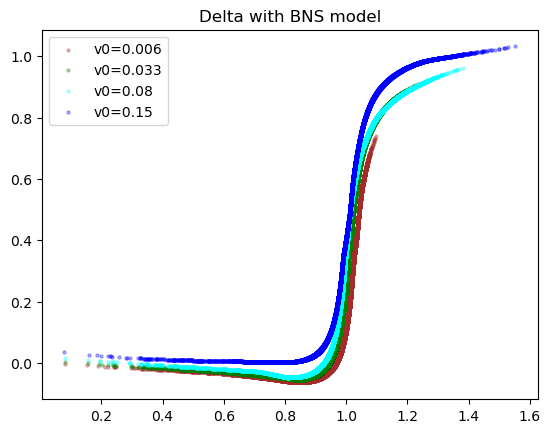

In [162]:
colors = ['brown','green','cyan','blue']#,'purple','red','orange','yellow']
vol = [0.006,0.033,0.08,0.15,0.5]#,0.5,0.6,0.7,0.8]
for i in range(4):
    paths = paths_list[i][key_list[5]]['ADS'][28,:]
    df_delta = delta_list[i][key_list[5]]
    plt.scatter(x = paths_list[i][key_list[5]]['ADS'][28,:], y =df_delta, s = 5,label='v0='+str(vol[i]), alpha=0.3,color=colors[i])
plt.title('Delta with BNS model')
plt.legend()

Text(0, 0.5, 'Embedding')

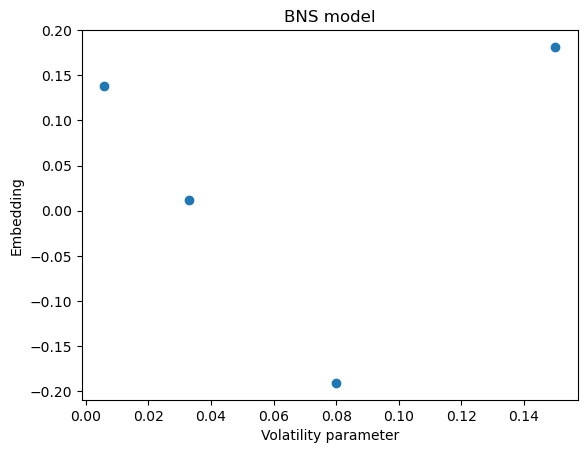

In [163]:
(w,) = embedding_list[0][key_list[5]]
vol = [0.006,0.033,0.08,0.15,0.5]#,0.6,0.7,0.8,0.9]
plt.scatter(vol[:-1],w[:-1])
plt.title('BNS model')
plt.xlabel('Volatility parameter')
plt.ylabel('Embedding')

(-0.25, 0.0)

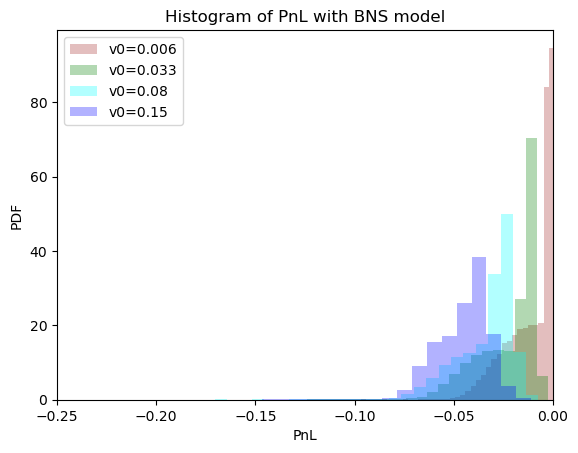

In [165]:
colors = ['brown','green','cyan','blue']#,'purple','red','orange','yellow']
vol = [0.006,0.033,0.08,0.15]#,0.5,0.6,0.7,0.8]
pnl_statistics = {}
for i in range(len(colors)):
    df_pnl = pd.DataFrame.from_dict(pnl_list[i][key_list[5]])
    plt.hist(df_pnl, bins=100, label='v0='+str(vol[i]), alpha=0.3,color=colors[i],density = True)
plt.legend()
plt.title('Histogram of PnL with BNS model')
plt.xlabel('PnL')
plt.ylabel('PDF')
plt.xlim([-0.25,0.0])

In [167]:
model_voltest= hedge_models_list[0][key_list[5]]

sim_results, emb_vec = repo.simulate_model('ADS', n_sims=50000, days = 30, freq='D',model= BNS(rho =-4.675,lmbda=0.5474,b=18.6075,a=0.6069,v0 = 0.0433),emb=4)
hedge_ins = {}
hedge_ins['ADS'] = sim_results

additional_states_ = {}
additional_states_["emb_key"] = emb_vec

paths = {}
paths.update(hedge_ins)
paths.update(additional_states_) 

print(paths)

payoff = compute_payoff(50000,1.,paths)


                    
pnl_vol00433 = model_voltest.train_task(model=model_voltest, paths=paths, payoff=payoff)

{'ADS': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.00564615, 0.998597  , 1.00732949, ..., 1.0056837 , 1.00307045,
        1.01706372],
       [1.00686863, 0.99801615, 1.01812862, ..., 1.01037831, 1.00085726,
        1.01854647],
       ...,
       [1.15603547, 1.02246432, 0.94307316, ..., 1.00782966, 0.96977095,
        0.99910674],
       [1.15125874, 1.02156354, 0.93296308, ..., 1.02034049, 0.97188546,
        0.98048678],
       [1.15389356, 1.02776272, 0.92608294, ..., 1.01241291, 0.96785323,
        1.00028845]]), 'emb_key': array([4., 4., 4., ..., 4., 4., 4.])}
Epoch 1/100
704/704 [==============================] - 7s 6ms/step - loss: 4.4854e-04
Epoch 2/100
704/704 [==============================] - 4s 6ms/step - loss: 4.7533e-04
Epoch 3/100
704/704 [==============================] - 4s 6ms/step - loss: 5.6495e-04
Epoch 4/100
704/704 [==============================] - 4s 6ms/step - loss: 4.6238e-04
Epoch 5/100
704/704 [

(-0.25, 0.0)

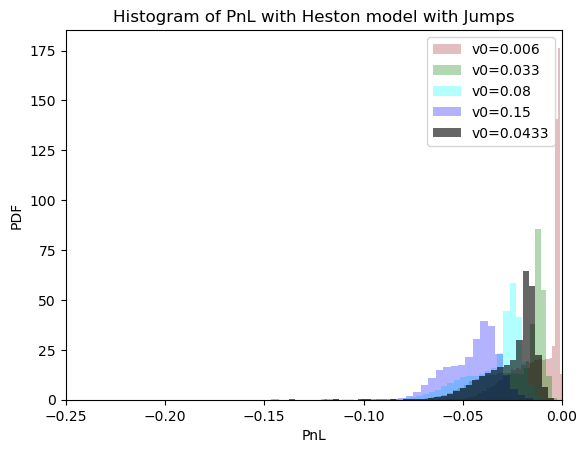

In [169]:
colors = ['brown','green','cyan','blue']#,'purple','red','orange','yellow']
vol = [0.006,0.033,0.08,0.15]#,0.5,0.6,0.7,0.8]
pnl_statistics = {}
for i in range(len(colors)):
    df_pnl = pd.DataFrame.from_dict(pnl_list[i][key_list[5]])
    plt.hist(df_pnl, bins=200, label='v0='+str(vol[i]), alpha=0.3,color=colors[i],density = True)

plt.hist(pnl_vol00433,bins=200, label='v0=0.0433', alpha=0.6,color='black',density = True)
plt.legend()
plt.title('Histogram of PnL with Heston model with Jumps')
plt.xlabel('PnL')
plt.ylabel('PDF')
plt.xlim([-0.25,0.0])

## Vanilla Call Option, GBM and Heston model with different volatility parameters and embedding size = 2  

In [172]:
def setup(ref_keys,model,emb):
    sim_results = {}
    paths = {}
    pnl = {}
    delta = {}
    payoff = {}

    # simulate paths
    print('simulate paths')
    k =ref_keys
    sim_results[k], emb_vec = repo.simulate_model(k, n_sims=25000, days = 30, freq='D',model=model,emb=emb)
    paths = {k:{'ADS':sim_results[k]}}
    additional_states_ = {}
    additional_states_["emb_key"] = emb_vec
    paths[k].update(additional_states_) 

    # load models and specs
    print('load models and specs')
    get_hedge_model = repo.get_hedge_model(k)
    hedge_models = {k: get_hedge_model[0]}
    embeddings = {k: get_hedge_model[1]}
    specs = {k: EuropeanVanillaSpecification.from_dict(repo.results[k]['spec'][0])}
    #print(specs)
    print('compute delta and pnl')
    for k,v in hedge_models.items():
        pnl[k] = compute_pnl(25000, specs[k], paths[k], hedge_models[k])
        delta[k] = compute_delta(paths[k], 28, hedge_models[k])
        #payoff[k] = compute_payoff(5000, specs[k], paths[k])
        
    return sim_results, hedge_models, paths,specs, pnl, embeddings, delta#, payoff 

def compute_pnl(n_sims, specs, paths, hedge_model):
    pnl = {}
    delta = {}
    payoff = np.zeros((n_sims,))
    #for k in paths.keys():
    v = paths['ADS']
    payoff -= np.maximum(v[-1,:] - specs.strike,0)
    pnl = hedge_model.compute_pnl(paths, payoff)
    return pnl

def compute_delta(paths, t, hedge_model):
    print(paths)
    delta = hedge_model.compute_delta(paths,t).reshape((-1,))
    return delta 

experiments = {}
key_list = []
for k,v in repo.results.items():  
        key_list.append(k)

tmp={
        'ref_keys':key_list[6],
        'labels':{ key_list[6]: 'Test1'                
        }
}
experiments['test1'] = tmp

experiment = 'test1'
ref_keys = experiments[experiment]['ref_keys']
labels = experiments[experiment]['labels']
labels_T = {k:v for v,k in labels.items()}
model_list = [HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.2928, correlation_rho = -0.757,v0 = 0.009),
                  HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.2928, correlation_rho = -0.757,v0 = 0.04),
                  HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.2928, correlation_rho = -0.757,v0 = 0.09),
                  HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.2928, correlation_rho = -0.757,v0 = 0.16),
                    GBM(drift=0.0, volatility=0.1),GBM(drift=0.0, volatility=0.2),
                    GBM(drift=0.0, volatility=0.3),GBM(drift=0.0, volatility=0.4)]
         #GBM(drift=0.0, volatility=0.5),GBM(drift=0.0, volatility=0.6),GBM(drift=0.0, volatility=0.7),GBM(drift=0.0, volatility=0.8)]
sim_results_list = []
hedge_models_list = []
paths_list = []
specs_list = []
pnl_list = []
embedding_list = []
delta_list = []
count = 0
for i in model_list:
    sim_results,hedge_models,paths,specs,pnl,embeddings,delta= setup(ref_keys,i,count)
    sim_results_list.append(sim_results)
    hedge_models_list.append(hedge_models)
    paths_list.append(paths)
    specs_list.append(specs)
    pnl_list.append(pnl)
    embedding_list.append(embeddings)
    delta_list.append(delta)
    count = count + 1
#sim_results,hedge_models,specs, paths,delta,pnl  = setup(ref_keys)

simulate paths
load models and specs
compute delta and pnl
782/782 [==============================] - 4s 2ms/step
{'ADS': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.00249903, 0.99928919, 1.00326373, ..., 1.00488694, 1.00314215,
        1.00006596],
       [1.00327483, 0.99933872, 1.00098086, ..., 1.00699848, 1.00446628,
        1.00780671],
       ...,
       [1.05766528, 0.9647321 , 0.96268092, ..., 1.00685768, 1.00763658,
        0.9180949 ],
       [1.05653703, 0.96599915, 0.96319491, ..., 1.01219167, 1.00500863,
        0.91722502],
       [1.06406624, 0.96528722, 0.96179532, ..., 1.01036579, 0.9995944 ,
        0.92357809]]), 'emb_key': array([0., 0., 0., ..., 0., 0., 0.])}
[array([[1.        , 1.00249903, 1.00327483, ..., 1.05766528, 1.05653703,
        1.06406624],
       [1.        , 0.99928919, 0.99933872, ..., 0.9647321 , 0.96599915,
        0.96528722],
       [1.        , 1.00326373, 1.00098086, ..., 0.96268092, 0

In [174]:
(w,) = embedding_list[0][key_list[6]]

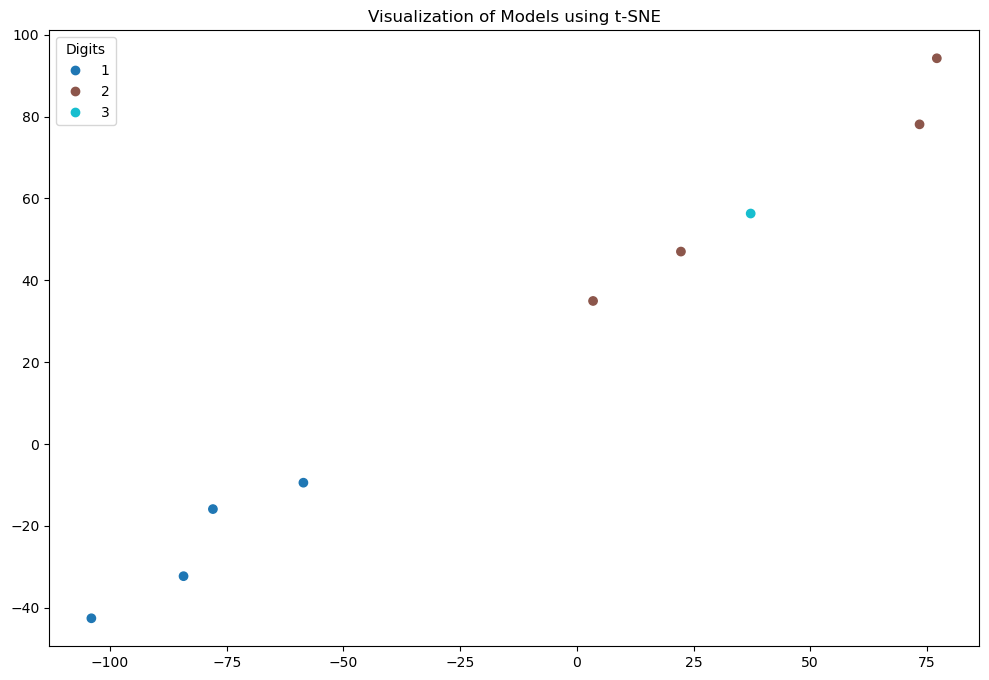

In [207]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=1, n_iter=15000, metric="cosine",perplexity=2)
X_tsne = tsne.fit_transform(w)
y_subset = [1,1,1,1,2,2,2,2,3]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='tab10')
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('Visualization of Models using t-SNE, 1 = Heston, 2 = GBM, 3 = extra')
plt.show()

In [208]:
model_vol01= hedge_models_list[0][key_list[6]]

sim_results, emb_vec = repo.simulate_model('ADS', n_sims=25000, days = 30, freq='D',model= GBM(drift=0.0, volatility=0.25),emb=4)
hedge_ins = {}
hedge_ins['ADS'] = sim_results

additional_states_ = {}
additional_states_["emb_key"] = emb_vec

paths = {}
paths.update(hedge_ins)
paths.update(additional_states_) 

print(paths)

payoff = compute_payoff(25000,1.,paths)


                    
pnl_vol09 = model_vol01.train_task(model=model_vol01, paths=paths, payoff=payoff)

{'ADS': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.00654367, 0.99193583, 0.99355482, ..., 0.98178516, 1.01477485,
        0.99292243],
       [1.00460415, 1.01660342, 0.99101501, ..., 0.99443804, 1.02010121,
        0.99239467],
       ...,
       [0.93638674, 0.93402669, 1.00288837, ..., 1.03458344, 1.06266466,
        0.92581711],
       [0.92884876, 0.93807071, 0.99575394, ..., 1.02675717, 1.06893979,
        0.91185244],
       [0.92516779, 0.95024571, 1.00249065, ..., 1.00097979, 1.05469851,
        0.92085234]]), 'emb_key': array([4., 4., 4., ..., 4., 4., 4.])}
Epoch 1/100
352/352 [==============================] - 11s 8ms/step - loss: 3.4478e-05
Epoch 2/100
352/352 [==============================] - 3s 8ms/step - loss: 3.2383e-05
Epoch 3/100
352/352 [==============================] - 3s 9ms/step - loss: 3.2160e-05
Epoch 4/100
352/352 [==============================] - 4s 10ms/step - loss: 3.1455e-05
Epoch 5/100
352/352

(-0.25, 0.0)

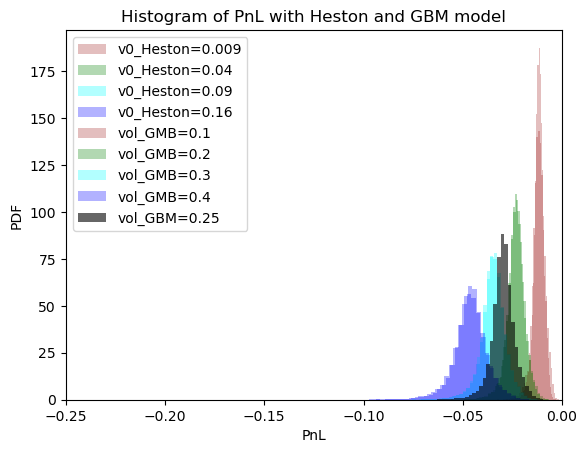

In [213]:
colors = ['brown','green','cyan','blue','brown','green','cyan','blue']#,'purple','red','orange','yellow']
vol = [0.009,0.04,0.09,0.16,0.1,0.2,0.3,0.4]
pnl_statistics = {}
for i in range(4):
    df_pnl = pd.DataFrame.from_dict(pnl_list[i][key_list[6]])
    plt.hist(df_pnl, bins=50, label='v0_Heston='+str(vol[i]), alpha=0.3,color=colors[i],density = True)
for i in range(4,8):
    df_pnl = pd.DataFrame.from_dict(pnl_list[i][key_list[6]])
    plt.hist(df_pnl, bins=50, label='vol_GMB='+str(vol[i]), alpha=0.3,color=colors[i],density = True)

plt.hist(pnl_vol00654,bins=50, label='vol_GBM=0.25', alpha=0.6,color='black',density = True)
plt.legend()
plt.title('Histogram of PnL with Heston and GBM model')
plt.xlabel('PnL')
plt.ylabel('PDF')
plt.xlim([-0.25,0.0])

## Vanilla Call Option, GBM,Heston model, Heston with Jumps, BNS with different parameters and embedding size = 4 

In [216]:
def setup(ref_keys,model,emb):
    sim_results = {}
    paths = {}
    pnl = {}
    delta = {}
    payoff = {}

    # simulate paths
    print('simulate paths')
    k =ref_keys
    sim_results[k], emb_vec = repo.simulate_model(k, n_sims=5000, days = 30, freq='D',model=model,emb=emb)
    paths = {k:{'ADS':sim_results[k]}}
    additional_states_ = {}
    additional_states_["emb_key"] = emb_vec
    paths[k].update(additional_states_) 

    # load models and specs
    print('load models and specs')
    get_hedge_model = repo.get_hedge_model(k)
    hedge_models = {k: get_hedge_model[0]}
    embeddings = {k: get_hedge_model[1]}
    specs = {k: EuropeanVanillaSpecification.from_dict(repo.results[k]['spec'][0])}
    #print(specs)
    print('compute delta and pnl')
    for k,v in hedge_models.items():
        pnl[k] = compute_pnl(5000, specs[k], paths[k], hedge_models[k])
        delta[k] = compute_delta(paths[k], 28, hedge_models[k])
        #payoff[k] = compute_payoff(5000, specs[k], paths[k])
        
    return sim_results, hedge_models, paths,specs, pnl, embeddings, delta#, payoff 

def compute_pnl(n_sims, specs, paths, hedge_model):
    pnl = {}
    delta = {}
    payoff = np.zeros((n_sims,))
    #for k in paths.keys():
    v = paths['ADS']
    payoff -= np.maximum(v[-1,:] - specs.strike,0)
    pnl = hedge_model.compute_pnl(paths, payoff)
    return pnl

def compute_delta(paths, t, hedge_model):
    print(paths)
    delta = hedge_model.compute_delta(paths,t).reshape((-1,))
    return delta 

experiments = {}
key_list = []
for k,v in repo.results.items():  
        key_list.append(k)

tmp={
        'ref_keys':key_list[7],
        'labels':{ key_list[7]: 'Test1'                
        }
}
experiments['test1'] = tmp

experiment = 'test1'
ref_keys = experiments[experiment]['ref_keys']
labels = experiments[experiment]['labels']
labels_T = {k:v for v,k in labels.items()}
model_list = [HestonForDeepHedging(rate_of_mean_reversion = 0.06067,long_run_average = 0.0707,
                  vol_of_vol = 0.2928, correlation_rho = -0.757,v0 = 0.009),
                HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.707,
                  vol_of_vol = 0.2928, correlation_rho = -0.757,v0 = 0.009),
                  HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.02928, correlation_rho = -0.757,v0 = 0.009),
                  HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.2928, correlation_rho = -0.0757,v0 = 0.04),
            HestonForDeepHedging(rate_of_mean_reversion = 0.06067,long_run_average = 0.0707,
                  vol_of_vol = 0.2928, correlation_rho = -0.757,v0 = 0.04),
                HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.707,
                  vol_of_vol = 0.2928, correlation_rho = -0.757,v0 = 0.04),
                  HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.02928, correlation_rho = -0.757,v0 = 0.04),
                  HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.2928, correlation_rho = -0.0757,v0 = 0.04),
            HestonForDeepHedging(rate_of_mean_reversion = 0.06067,long_run_average = 0.0707,
                  vol_of_vol = 0.2928, correlation_rho = -0.757,v0 = 0.09),
                HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.707,
                  vol_of_vol = 0.2928, correlation_rho = -0.757,v0 = 0.09),
                  HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.02928, correlation_rho = -0.757,v0 = 0.09),
                  HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.2928, correlation_rho = -0.0757,v0 = 0.09),
            HestonForDeepHedging(rate_of_mean_reversion = 0.06067,long_run_average = 0.0707,
                  vol_of_vol = 0.2928, correlation_rho = -0.757,v0 = 0.16),
                HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.707,
                  vol_of_vol = 0.2928, correlation_rho = -0.757,v0 = 0.16),
                  HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.02928, correlation_rho = -0.757,v0 = 0.16),
                  HestonForDeepHedging(rate_of_mean_reversion = 0.6067,long_run_average = 0.0707,
                  vol_of_vol = 0.2928, correlation_rho = -0.0757,v0 = 0.16),
                GBM(drift=-0.1, volatility=0.1),GBM(drift=-0.05, volatility=0.1),GBM(drift=0.05, volatility=0.1),GBM(drift=0.1, volatility=0.1),
                GBM(drift=-0.1, volatility=0.2),GBM(drift=-0.05, volatility=0.2),GBM(drift=0.05, volatility=0.2),GBM(drift=0.1, volatility=0.2),
                GBM(drift=-0.1, volatility=0.3),GBM(drift=-0.05, volatility=0.3),GBM(drift=0.05, volatility=0.3),GBM(drift=0.1, volatility=0.3),
                GBM(drift=-0.1, volatility=0.4),GBM(drift=-0.05, volatility=0.4),GBM(drift=0.05, volatility=0.4),GBM(drift=0.1, volatility=0.4),
            BNS(rho =-0.4675,lmbda=0.5474,b=18.6075,a=0.6069,v0 = 0.006),
                BNS(rho =-4.675,lmbda=0.05474,b=18.6075,a=0.6069,v0 = 0.006),
                BNS(rho =-4.675,lmbda=0.5474,b=1.86075,a=0.6069,v0 = 0.006),
                BNS(rho =-4.675,lmbda=0.5474,b=18.6075,a=0.06069,v0 = 0.006),
            BNS(rho =-0.4675,lmbda=0.5474,b=18.6075,a=0.6069,v0 = 0.033),
                BNS(rho =-4.675,lmbda=0.05474,b=18.6075,a=0.6069,v0 = 0.033),
                BNS(rho =-4.675,lmbda=0.5474,b=1.86075,a=0.6069,v0 = 0.033),
                BNS(rho =-4.675,lmbda=0.5474,b=18.6075,a=0.06069,v0 = 0.033),
            BNS(rho =-0.4675,lmbda=0.5474,b=18.6075,a=0.6069,v0 = 0.08),
                BNS(rho =-4.675,lmbda=0.05474,b=18.6075,a=0.6069,v0 = 0.08),
                BNS(rho =-4.675,lmbda=0.5474,b=1.86075,a=0.6069,v0 = 0.08),
                BNS(rho =-4.675,lmbda=0.5474,b=18.6075,a=0.06069,v0 = 0.08),
            HestonWithJumps(rate_of_mean_reversion = 0.04963,long_run_average = 0.065,
                vol_of_vol = 0.2286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.007),
                HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.65,
                vol_of_vol = 0.2286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.007),
                HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.065,
                vol_of_vol = 0.02286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.007),
                HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.065,
                vol_of_vol = 0.2286, correlation_rho = -0.099,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.007),
            HestonWithJumps(rate_of_mean_reversion = 0.04963,long_run_average = 0.065,
                vol_of_vol = 0.2286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.032),
                HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.65,
                vol_of_vol = 0.2286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.032),
                HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.065,
                vol_of_vol = 0.02286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.032),
                HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.065,
                vol_of_vol = 0.2286, correlation_rho = -0.099,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.032),
            HestonWithJumps(rate_of_mean_reversion = 0.04963,long_run_average = 0.065,
                vol_of_vol = 0.2286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.085),
                HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.65,
                vol_of_vol = 0.2286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.085),
                HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.065,
                vol_of_vol = 0.02286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.085),
                HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.065,
                vol_of_vol = 0.2286, correlation_rho = -0.099,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.085),
            HestonWithJumps(rate_of_mean_reversion = 0.04963,long_run_average = 0.065,
                vol_of_vol = 0.2286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.15),
                HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.65,
                vol_of_vol = 0.2286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.15),
                HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.065,
                vol_of_vol = 0.02286, correlation_rho = -0.99,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.15),
                HestonWithJumps(rate_of_mean_reversion = 0.4963,long_run_average = 0.065,
                vol_of_vol = 0.2286, correlation_rho = -0.099,muj = 0.1791,sigmaj = 0.1346, lmbda = 0.1382,v0 = 0.15)]
         #GBM(drift=0.0, volatility=0.5),GBM(drift=0.0, volatility=0.6),GBM(drift=0.0, volatility=0.7),GBM(drift=0.0, volatility=0.8)]
sim_results_list = []
hedge_models_list = []
paths_list = []
specs_list = []
pnl_list = []
embedding_list = []
delta_list = []
count = 0
for i in model_list:
    sim_results,hedge_models,paths,specs,pnl,embeddings,delta= setup(ref_keys,i,count)
    sim_results_list.append(sim_results)
    hedge_models_list.append(hedge_models)
    paths_list.append(paths)
    specs_list.append(specs)
    pnl_list.append(pnl)
    embedding_list.append(embeddings)
    delta_list.append(delta)
    count = count + 1
#sim_results,hedge_models,specs, paths,delta,pnl  = setup(ref_keys)

simulate paths
load models and specs
compute delta and pnl
157/157 [==============================] - 3s 2ms/step
{'ADS': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.00249903, 0.99928919, 1.00326373, ..., 1.01583311, 1.00407654,
        0.99571328],
       [1.00025127, 0.99698296, 0.99512662, ..., 1.01371526, 1.00611994,
        0.99897854],
       ...,
       [1.03195419, 1.00563972, 0.99435489, ..., 1.00764493, 1.0209395 ,
        0.99445259],
       [1.03047209, 1.00066881, 0.99570039, ..., 1.00429116, 1.02420334,
        0.99662432],
       [1.0280737 , 0.99476869, 0.99519496, ..., 1.00365536, 1.0246923 ,
        0.99962216]]), 'emb_key': array([0., 0., 0., ..., 0., 0., 0.])}
[array([[1.        , 1.00249903, 1.00025127, ..., 1.03195419, 1.03047209,
        1.0280737 ],
       [1.        , 0.99928919, 0.99698296, ..., 1.00563972, 1.00066881,
        0.99476869],
       [1.        , 1.00326373, 0.99512662, ..., 0.99435489, 0

In [295]:
price_list = []
for i in model_list:
    price_list.append(i.compute_call_price(1.,i.v0,1.,ttm=30))


In [259]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

C:\Users\Anwender\AppData\Local\Temp\ipykernel_21072\3838609731.py:24: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



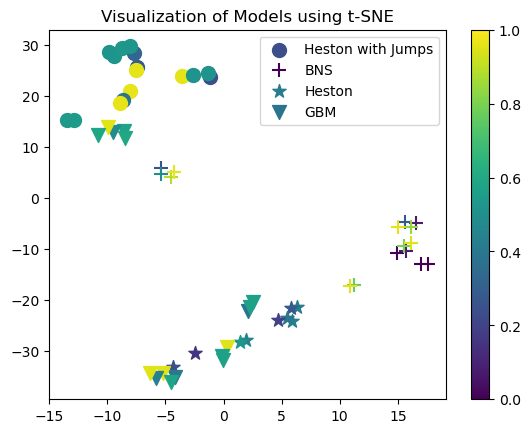

In [314]:
(w,) = embedding_list[0][key_list[7]]
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0,perplexity=5,n_iter=15000)
X_tsne = tsne.fit_transform(w)
y_subset = [1,1,1,1,
            1,1,1,1,
            1,1,1,1,
            1,1,1,1,
            2,2,2,2,
            2,2,2,2,
            2,2,2,2,
            2,2,2,2,
            3,3,3,3,
            3,3,3,3,
            3,3,3,3,
            4,4,4,4,
            4,4,4,4,
            4,4,4,4,
            4,4,4,4,99]
colors = ['red','green','cyan','blue','black']
modelname = ['Heston with Jumps', 'BNS', 'Heston', 'GBM']
sign = ['o','+','*','v']
cm = plt.cm.get_cmap('viridis')
fig, ax = plt.subplots()
for i in range(60):
    n = y_subset[i]
    if price_list[i] < 5.:
        sc = plt.scatter(X_tsne[i, 0], X_tsne[i, 1],s=100, c =price_list[i],vmin=0, vmax=1,marker = sign[n-1],cmap = cm,label=modelname[n-1]) 
plt.legend(*scatter.legend_elements(), title="Models")
legend_without_duplicate_labels(ax)
#ax.legend()
plt.title('Visualization of Models using t-SNE')
plt.colorbar(sc)
plt.show()

In [307]:
model_vol01= hedge_models_list[0][key_list[7]]

sim_results, emb_vec = repo.simulate_model('ADS', n_sims=50000, days = 30, freq='D',model= GBM(drift=0.0, volatility=0.25),emb=60)
hedge_ins = {}
hedge_ins['ADS'] = sim_results

additional_states_ = {}
additional_states_["emb_key"] = emb_vec

paths = {}
paths.update(hedge_ins)
paths.update(additional_states_) 

print(paths)

payoff = compute_payoff(50000,1.,paths)


                    
pnl_voltest = model_vol01.train_task(model=model_vol01, paths=paths, payoff=payoff)

{'ADS': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.00654367, 0.99193583, 0.99355482, ..., 1.00726588, 0.9965448 ,
        0.99861903],
       [1.00460415, 1.01660342, 0.99101501, ..., 0.99679576, 1.00705607,
        0.98783246],
       ...,
       [0.93638674, 0.93402669, 1.00288837, ..., 0.89788913, 1.09356623,
        0.98638635],
       [0.92884876, 0.93807071, 0.99575394, ..., 0.91931331, 1.10298425,
        0.98111595],
       [0.92516779, 0.95024571, 1.00249065, ..., 0.90971597, 1.10763235,
        1.00526923]]), 'emb_key': array([60., 60., 60., ..., 60., 60., 60.])}
Epoch 1/100
704/704 [==============================] - 12s 13ms/step - loss: 8.9667e-05
Epoch 2/100
704/704 [==============================] - 10s 14ms/step - loss: 5.2802e-05
Epoch 3/100
704/704 [==============================] - 10s 15ms/step - loss: 5.3012e-05
Epoch 4/100
704/704 [==============================] - 10s 14ms/step - loss: 5.2926e-05
Epoch 5

(-0.25, 0.0)

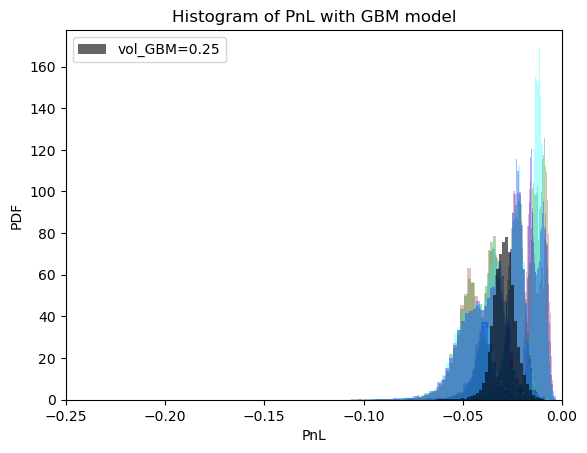

In [309]:
colors = ['brown','green','cyan','blue','brown','green','cyan','blue','brown','green','cyan','blue','brown','green','cyan','blue']
pnl_statistics = {}
for i in range(16,32):
    df_pnl = pd.DataFrame.from_dict(pnl_list[i][key_list[7]])
    plt.hist(df_pnl, bins=50, alpha=0.3,color=colors[i-16],density = True)


plt.hist(pnl_voltest,bins=50, label='vol_GBM=0.25', alpha=0.6,color='black',density = True)
plt.legend()
plt.title('Histogram of PnL with GBM model')
plt.xlabel('PnL')
plt.ylabel('PDF')
plt.xlim([-0.25,0.0])

## Vanilla Call Option, GBM ,Heston model, Heston with Jumps, BNS with more or less random parameters and embedding size = 4 

In [20]:
repo = analysis.Repo('./test_models/')
key_list = list(repo.results.keys())
key_list

['6036338130683d8aa3f5cd8cd736462424225e9b']

In [22]:
def setup(ref_keys,model,emb):
    sim_results = {}
    paths = {}
    pnl = {}
    delta = {}
    payoff = {}

    # simulate paths
    print('simulate paths')
    k =ref_keys
    sim_results[k], emb_vec = repo.simulate_model(k, n_sims=2000, days = 30, freq='D',model=model,emb=emb)
    paths = {k:{'ADS':sim_results[k]}}
    additional_states_ = {}
    additional_states_["emb_key"] = emb_vec
    paths[k].update(additional_states_) 
    price = repo.get_call_price(k, sim_results=sim_results[k], seed=42, model=model,n_sims=10000,days=30,freq='D')
    
    # load models and specs
    print('load models and specs')
    get_hedge_model = repo.get_hedge_model(k)
    hedge_models = {k: get_hedge_model[0]}
    embeddings = {k: get_hedge_model[1]}
    specs = {k: EuropeanVanillaSpecification.from_dict(repo.results[k]['spec'][0])}
    #print(specs)
    print('compute delta and pnl')
    for k,v in hedge_models.items():
        pnl[k] = compute_pnl(2000, specs[k], paths[k], hedge_models[k])
        delta[k] = compute_delta(paths[k], 28, hedge_models[k])
        #payoff[k] = compute_payoff(5000, specs[k], paths[k])
        
    return sim_results, hedge_models, paths,specs, pnl, embeddings, delta, price#, payoff 

def compute_pnl(n_sims, specs, paths, hedge_model):
    pnl = {}
    delta = {}
    payoff = np.zeros((n_sims,))
    #for k in paths.keys():
    v = paths['ADS']
    payoff -= np.maximum(v[-1,:] - specs.strike,0)
    pnl = hedge_model.compute_pnl(paths, payoff)
    return pnl

def compute_delta(paths, t, hedge_model):
    print(paths)
    delta = hedge_model.compute_delta(paths,t).reshape((-1,))
    return delta 

experiments = {}
key_list = []
for k,v in repo.results.items():  
        key_list.append(k)

tmp={
        'ref_keys':key_list[-1],
        'labels':{ key_list[-1]: 'Test1'                
        }
}
experiments['test1'] = tmp

experiment = 'test1'
ref_keys = experiments[experiment]['ref_keys']
labels = experiments[experiment]['labels']
labels_T = {k:v for v,k in labels.items()}

import ast  
with open('model_params_dict.txt') as f: 
    data = f.read() 
model_params = ast.literal_eval(data) 

model_list = []

count = 0
for i in range(64):
    count = count +1
    model_list.append(GBM(model_params['GBM']['drift'][i],model_params['GBM']['vol'][i]))
    model_list.append(HestonForDeepHedging(rate_of_mean_reversion = model_params['Heston']['rate_of_mean_reversion'][i],
                                      long_run_average = model_params['Heston']['long_run_average'][i],
                                      vol_of_vol = model_params['Heston']['vol_of_vol'][i], 
                                      correlation_rho = model_params['Heston']['correlation_rho'][i],
                                      v0 = model_params['Heston']['v0'][i]))
    model_list.append(HestonWithJumps(rate_of_mean_reversion = model_params['Heston with Jumps']['rate_of_mean_reversion'][i],
                                 long_run_average = model_params['Heston with Jumps']['long_run_average'][i],
                                 vol_of_vol = model_params['Heston with Jumps']['vol_of_vol'][i], 
                                correlation_rho = model_params['Heston with Jumps']['correlation_rho'][i],
                                 muj = 0.1791,sigmaj = 0.1346, 
                                 lmbda = model_params['Heston with Jumps']['lmbda'][i],
                                 v0 = model_params['Heston with Jumps']['v0'][i]))
    model_list.append(BNS(rho =model_params['BNS']['rho'][i],
                     lmbda=model_params['BNS']['lmbda'][i],
                     b=model_params['BNS']['b'][i],
                     a=model_params['BNS']['a'][i],
                     v0 = model_params['BNS']['v0'][i]))


sim_results_list = []
hedge_models_list = []
paths_list = []
specs_list = []
pnl_list = []
embedding_list = []
delta_list = []
price_list = []
count = 0
for i in model_list:
    sim_results,hedge_models,paths,specs,pnl,embeddings,delta,price= setup(ref_keys,i,count)
    sim_results_list.append(sim_results)
    hedge_models_list.append(hedge_models)
    paths_list.append(paths)
    specs_list.append(specs)
    pnl_list.append(pnl)
    embedding_list.append(embeddings)
    delta_list.append(delta)
    price_list.append(price)
    count = count + 1
#sim_results,hedge_models,specs, paths,delta,pnl  = setup(ref_keys)

simulate paths
load models and specs
compute delta and pnl
63/63 [==============================] - 2s 3ms/step
{'ADS': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.00263366, 0.99678768, 0.99743813, ..., 1.00107492, 1.00269058,
        1.01042776],
       [1.00188171, 1.00665137, 0.99643863, ..., 0.99804234, 1.01427515,
        1.01216158],
       ...,
       [0.97463182, 0.9736485 , 1.00175039, ..., 1.00398528, 1.09813934,
        1.03922569],
       [0.97150651, 0.97535328, 0.99891499, ..., 1.00633735, 1.09634707,
        1.02720911],
       [0.96998529, 0.98041808, 1.00163405, ..., 1.00723391, 1.08788456,
        1.02715957]]), 'emb_key': array([0., 0., 0., ..., 0., 0., 0.])}
63/63 [==============================] - 0s 1ms/step
simulate paths
load models and specs
compute delta and pnl
63/63 [==============================] - 2s 3ms/step
{'ADS': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
       

In [23]:
price_list

[0.011436928026247184,
 0.011395745578537965,
 0.012696842600735083,
 0.011816352899572809,
 0.01224553830536701,
 0.027177017203282788,
 0.015023004531180963,
 0.027609815763174783,
 0.013054136005728856,
 0.03670051974263774,
 0.017409551158789824,
 0.03714217689154838,
 0.013862720296875741,
 0.044214003843544576,
 0.01985323061790095,
 0.04466284803594769,
 0.014671290348391652,
 0.05062055455569859,
 0.022350157564714028,
 0.05107559829972171,
 0.01547984532990454,
 0.05629933965656791,
 0.028369157476773117,
 0.056759912587995585,
 0.016288384411088985,
 0.061452450779527754,
 0.030465317549481355,
 0.06191805945323411,
 0.01709690676166825,
 0.06620275664896691,
 0.03257318203652795,
 0.06667301812467158,
 0.01790541155141745,
 0.0706315775634208,
 0.03469166844785877,
 0.0711061833681082,
 0.018713897950165592,
 0.07479604434496613,
 0.03681967894442267,
 0.07527473900558977,
 0.01952236512779848,
 0.0787381149664877,
 0.03782681201298167,
 0.07922068231951933,
 0.0203308122542

In [24]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

c:\Users\Anwender\.conda\envs\rivapyFS\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.

C:\Users\Anwender\AppData\Local\Temp\ipykernel_3456\2005313575.py:84: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



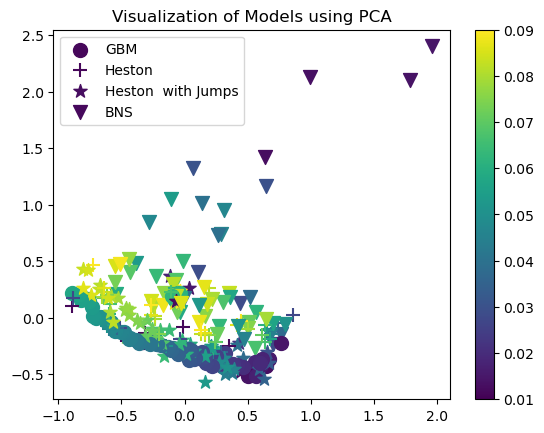

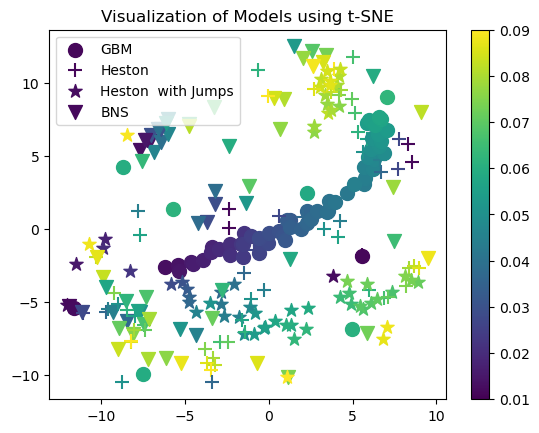

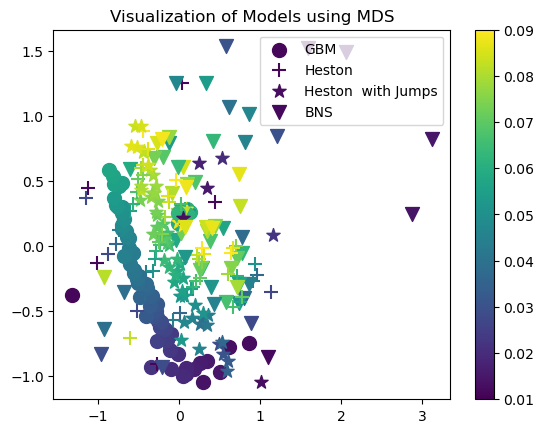

In [43]:
(w,) = embedding_list[0][key_list[-1]]
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,random_state=0,perplexity=30,n_iter=15000, metric="cosine")
X_tsne = tsne.fit_transform(w)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(w)

from sklearn.manifold import MDS
mds = MDS(n_components=2)
X_mds = mds.fit_transform(w)


y_subset = [1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,
            1,2,3,4,99]
colors = ['red','green','cyan','blue','black']
modelname = ['GBM','Heston', 'Heston  with Jumps', 'BNS']
sign = ['o','+','*','v']
cm = plt.cm.get_cmap('viridis')



fig, ax = plt.subplots()
for i in range(64*4):
    n = y_subset[i]
    sc = plt.scatter(X_pca[i, 0], X_pca[i, 1],s=100, c =price_list[i],vmin=0.01, vmax=0.09,marker = sign[n-1],cmap = cm,label=modelname[n-1]) 
#plt.legend(*scatter.legend_elements(), title="Models")
legend_without_duplicate_labels(ax)
#ax.legend()
plt.title('Visualization of Models using PCA')
plt.colorbar(sc)
plt.show()



fig, ax = plt.subplots()
for i in range(64*4):
    n = y_subset[i]
    sc = plt.scatter(X_tsne[i, 0], X_tsne[i, 1],s=100, c =price_list[i],vmin=0.01, vmax=0.09,marker = sign[n-1],cmap = cm,label=modelname[n-1]) 
#plt.legend(*scatter.legend_elements(), title="Models")
legend_without_duplicate_labels(ax)
#ax.legend()
plt.title('Visualization of Models using t-SNE')
plt.colorbar(sc)
plt.show()



fig, ax = plt.subplots()
for i in range(64*4):
    n = y_subset[i]
    sc = plt.scatter(X_mds[i, 0], X_mds[i, 1],s=100, c =price_list[i],vmin=0.01, vmax=0.09,marker = sign[n-1],cmap = cm,label=modelname[n-1]) 
#plt.legend(*scatter.legend_elements(), title="Models")
legend_without_duplicate_labels(ax)
#ax.legend()
plt.title('Visualization of Models using MDS')
plt.colorbar(sc)
plt.show()



c:\Users\Anwender\.conda\envs\rivapyFS\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



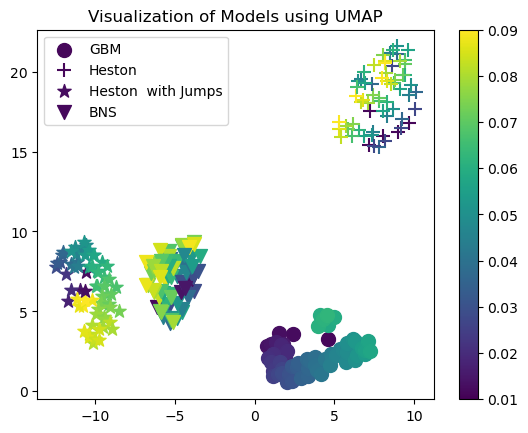

In [59]:
import umap  # pip install umap-learn

manifold = umap.UMAP(n_neighbors=100, random_state=42,min_dist=0.9).fit(w,y_subset)
X_umap = manifold.transform(w)


fig, ax = plt.subplots()
for i in range(64*4):
    n = y_subset[i]
    sc = plt.scatter(X_umap[i, 0], X_umap[i, 1],s=100, c =price_list[i],vmin=0.01, vmax=0.09,marker = sign[n-1],cmap = cm,label=modelname[n-1]) 
#plt.legend(*scatter.legend_elements(), title="Models")
legend_without_duplicate_labels(ax)
#ax.legend()
plt.title('Visualization of Models using UMAP')
plt.colorbar(sc)
plt.show()

In [36]:
model_vol01= hedge_models_list[0][key_list[-1]]

sim_results, emb_vec = repo.simulate_model('ADS', n_sims=50000, days = 30, freq='D',model= GBM(drift=0.0, volatility=0.25),emb=64)
hedge_ins = {}
hedge_ins['ADS'] = sim_results

additional_states_ = {}
additional_states_["emb_key"] = emb_vec

paths = {}
paths.update(hedge_ins)
paths.update(additional_states_) 

print(paths)

payoff = compute_payoff(50000,1.,paths)


                    
pnl_voltest = model_vol01.train_task(model=model_vol01, paths=paths, payoff=payoff)

{'ADS': array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.00654367, 0.99193583, 0.99355482, ..., 1.00726588, 0.9965448 ,
        0.99861903],
       [1.00460415, 1.01660342, 0.99101501, ..., 0.99679576, 1.00705607,
        0.98783246],
       ...,
       [0.93638674, 0.93402669, 1.00288837, ..., 0.89788913, 1.09356623,
        0.98638635],
       [0.92884876, 0.93807071, 0.99575394, ..., 0.91931331, 1.10298425,
        0.98111595],
       [0.92516779, 0.95024571, 1.00249065, ..., 0.90971597, 1.10763235,
        1.00526923]]), 'emb_key': array([64., 64., 64., ..., 64., 64., 64.])}
Epoch 1/100
704/704 [==============================] - 3s 3ms/step - loss: 5.0815e-04
Epoch 2/100
704/704 [==============================] - 3s 4ms/step - loss: 5.0794e-04
Epoch 3/100
704/704 [==============================] - 2s 3ms/step - loss: 5.0759e-04
Epoch 4/100
704/704 [==============================] - 2s 3ms/step - loss: 5.0801e-04
Epoch 5/100
704

(-0.25, 0.0)

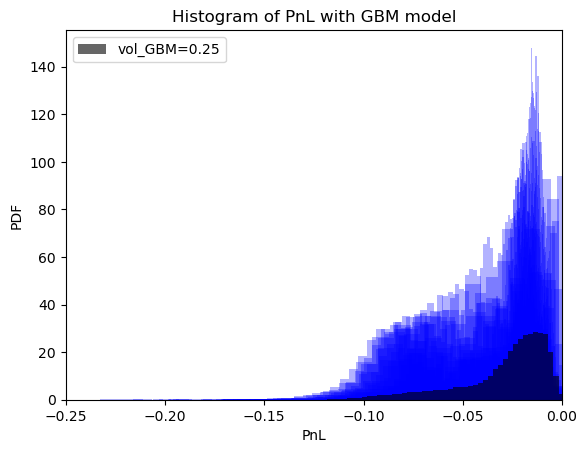

In [37]:
#colors = ['brown','green','cyan','blue','brown','green','cyan','blue','brown','green','cyan','blue','brown','green','cyan','blue']
pnl_statistics = {}
for i in range(64):
    df_pnl = pd.DataFrame.from_dict(pnl_list[i][key_list[-1]])
    plt.hist(df_pnl, bins=50, alpha=0.3,color='blue',density = True)


plt.hist(pnl_voltest,bins=50, label='vol_GBM=0.25', alpha=0.6,color='black',density = True)
plt.legend()
plt.title('Histogram of PnL with GBM model')
plt.xlabel('PnL')
plt.ylabel('PDF')
plt.xlim([-0.25,0.0])

# Some first/old test

(-0.25, 0.0)

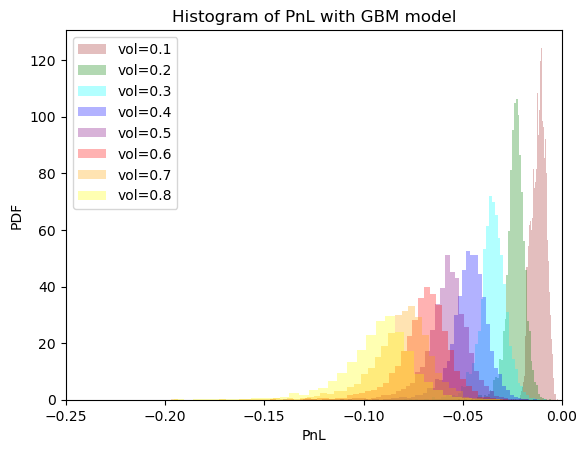

In [265]:
colors = ['brown','green','cyan','blue','purple','red','orange','yellow']
vol = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
pnl_statistics = {}
for i in range(len(colors)):
    df_pnl = pd.DataFrame.from_dict(pnl_list[i][key_list[3]])
    plt.hist(df_pnl, bins=50, label='vol='+str(vol[i]), alpha=0.3,color=colors[i],density = True)
plt.legend()
plt.title('Histogram of PnL with GBM model')
plt.xlabel('PnL')
plt.ylabel('PDF')
plt.xlim([-0.25,0.0])

In [267]:
pnl_statistics = []
for i in range(len(vol)):
    df_pnl = pd.DataFrame.from_dict(pnl_list[i][key_list[3]])
    pnl_statistics.append({str(vol[i]): {"mean": df_pnl.mean(),
            "var": df_pnl.var(),
            "1%": np.percentile(df_pnl, 1),
            "99%": np.percentile(df_pnl, 99),
            "5%": np.percentile(df_pnl, 5),
            "95%": np.percentile(df_pnl, 95) }})


pnl_statistics[0]

{'0.1': {'mean': 0   -0.011681
  dtype: float64,
  'var': 0    0.000012
  dtype: float64,
  '1%': -0.019089586335190378,
  '99%': -0.0048912312653967265,
  '5%': -0.017542239957668994,
  '95%': -0.006385476887226104}}

Text(0, 0.5, 'Embedding')

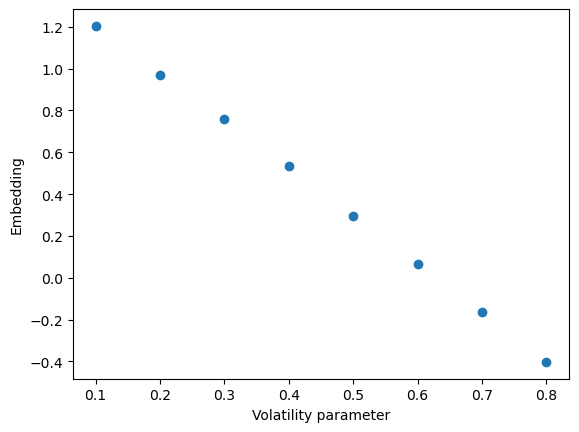

In [269]:
(w,) = embedding_list[0][key_list[3]]
plt.scatter(vol,w)
plt.xlabel('Volatility parameter')
plt.ylabel('Embedding')

#